<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1">Libraries</a></span></li><li><span><a href="#Import-Clean-Transform-Pipeline" data-toc-modified-id="Import-Clean-Transform-Pipeline-2">Import-Clean-Transform Pipeline</a></span></li><li><span><a href="#Plot-Date-Conversion-Rate-Pipeline" data-toc-modified-id="Plot-Date-Conversion-Rate-Pipeline-3">Plot Date Conversion Rate Pipeline</a></span></li><li><span><a href="#Load-and-inspect-data" data-toc-modified-id="Load-and-inspect-data-4">Load and inspect data</a></span></li><li><span><a href="#Inspect-Date-Conversion-Ratio" data-toc-modified-id="Inspect-Date-Conversion-Ratio-5">Inspect Date Conversion Ratio</a></span></li><li><span><a href="#AB-Testing-per-Event-Pipeline" data-toc-modified-id="AB-Testing-per-Event-Pipeline-6">AB Testing per Event Pipeline</a></span></li><li><span><a href="#AB-Test-Work-of-action:" data-toc-modified-id="AB-Test-Work-of-action:-7">AB Test Work of action:</a></span></li><li><span><a href="#Checkout" data-toc-modified-id="Checkout-8">Checkout</a></span></li><li><span><a href="#Transaction" data-toc-modified-id="Transaction-9">Transaction</a></span></li><li><span><a href="#Suggested-Popup-Closed" data-toc-modified-id="Suggested-Popup-Closed-10">Suggested Popup Closed</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#March-2018" data-toc-modified-id="March-2018-10.0.1">March 2018</a></span></li><li><span><a href="#April-2018" data-toc-modified-id="April-2018-10.0.2">April 2018</a></span></li></ul></li></ul></li><li><span><a href="#Shop-List-Clicked" data-toc-modified-id="Shop-List-Clicked-11">Shop List Clicked</a></span></li><li><span><a href="#Suggested-Shop-Clicked" data-toc-modified-id="Suggested-Shop-Clicked-12">Suggested Shop Clicked</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#March-2018" data-toc-modified-id="March-2018-12.0.1">March 2018</a></span></li><li><span><a href="#April-2018" data-toc-modified-id="April-2018-12.0.2">April 2018</a></span></li></ul></li></ul></li><li><span><a href="#AB-Testing-per-Category-Pipeline" data-toc-modified-id="AB-Testing-per-Category-Pipeline-13">AB Testing per Category Pipeline</a></span></li><li><span><a href="#visitType" data-toc-modified-id="visitType-14">visitType</a></span></li><li><span><a href="#landingPage" data-toc-modified-id="landingPage-15">landingPage</a></span></li><li><span><a href="#appBrowser" data-toc-modified-id="appBrowser-16">appBrowser</a></span></li><li><span><a href="#source" data-toc-modified-id="source-17">source</a></span></li><li><span><a href="#medium" data-toc-modified-id="medium-18">medium</a></span></li></ul></div>

### Libraries

In [380]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import time
import gc
#plot
import matplotlib.pyplot as plt
import seaborn as sns #Graph library that use matplot in background
# normality tests
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
#display full dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

### Import-Clean-Transform Pipeline

In [320]:
'''Set a seed for reproducibility'''
seed = 1

'''Set path where all data files are located'''
path = 'C:/Users/Nikitas/Desktop/Nikitas/other_pet_projects/efood/'

'''Create load data function to easy import all necessary'''
def LoadJSONData(path,file):
    """Load Data from defined directory.
    Output is initial data dataframe."""
    data = [json.loads(line) for line in open(path + file, 'r')]
    data = pd.json_normalize(data)
    print ("Data is loaded!")
    print ("Data: ",data.shape[0],"observations, and ",data.shape[1],"features")
    #
    return data

'''Create function for providing summary statistics in a table'''
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing Percentage'] = df.isnull().sum().values/len(df)
    summary['Uniques'] = df.nunique().values
    return summary

'''Create function for easy aggregations at any level'''
def AggCol(df,group_by,col,agg):
       "input is df, groupbycol(s), desired aggregation. Output should be a column"
       col = df.groupby(group_by)[col].transform(agg)
       return col

'''Fix all columns datatypes to correct ones'''
def FixDataTypes(df):
    #convert date to datetime format
    data['df'] = pd.to_datetime(df['date'],infer_datetime_format=True)
    # convert metric_offset and events variables to int
    int_cols = ['metric_offset','events']
    for col in int_cols: 
        df[col] = df[col].astype(int)
    return df

'''Create new column which will be binary: Original/Variation'''
def VariationBinary(df):
    #binary event original or variation
    df['variation_binary'] = np.where((df['variation_name'] != 'Original'), 'Variation' , 'Original') 
    return df

'''Create date features'''
def DateFeatures(df):
    df = df.copy()
     # date features
    df['date']= pd.to_datetime(df['date'])
    df['date:day'] = df['date'].dt.day
    df['date:day_of_week'] = df['date'].dt.dayofweek
    df['date:is_weekend'] = np.where(df['date:day_of_week'].isin([5,6]), 1,0)
    df['date:month'] = df['date'].dt.month
    df['date:day_of_year'] = df['date'].dt.dayofyear
    return df

'''Convert categorical variables to less categories'''
def CatLandingPage(df):
    df = df.copy()
    #binary event original or variation
    df['landingPage'] = np.where(( (df['landingPage'] == 'home') | (df['landingPage'] == 'shop_details') | (df['landingPage'] == 'shop_list') ), df['landingPage'], 'other' ) 
    return df

'''Convert categorical variables to less categories'''
def CatappBrowser(df):
    df = df.copy()
    #binary event original or variation
    df['appBrowser'] = np.where(( (df['appBrowser'] == 'Chrome') | (df['appBrowser'] == 'Firefox') ), df['appBrowser'], 'other' ) 
    return df

'''Convert categorical variables to less categories'''
def Catmedium(df):
    df = df.copy()
    #binary event original or variation
    df['medium'] = np.where(( (df['medium'] == 'organic') | (df['medium'] == 'cpc') | (df['medium'] == "(none)")), df['medium'], 'other' ) 
    return df

'''Convert categorical variables to less categories'''
def Catsource(df):
    df = df.copy()
    #binary event original or variation
    df['source'] = np.where(( (df['source'] == 'google') | (df['source'] == "(direct)")), df['source'], 'other' ) 
    return df

'''Put data pipeline tasks in order for automation purposes'''
def DataPipeline(df):
    df = df.copy()
     # Pipeline
    df = FixDataTypes(df)
    df =  VariationBinary(df)
    df =  DateFeatures(df)
    df = CatLandingPage(df)
    df = CatappBrowser(df)
    df = Catmedium(df)
    df = Catsource(df)
    return df

### Plot Date Conversion Rate Pipeline

In [272]:
'''Select certain event to plot conversion distribution'''
def EventDf(df,event):
    df = df.copy()
    df = FilterEvent(df,event)
    df = FilterOutMonth(df)
    df = FlagEvents(df)
    return df

'''Plot every possible date level event and extract valuable info'''
def PlotDateEvents(df):
    # plot different levels of date conversion event
    PlotConversionRate(df, col='date:month', binary='events_flag',binary_name='Month',dodge=True)
    PlotConversionRate(df, col='date:is_weekend', binary='events_flag',binary_name='Weekend',dodge=True)
    PlotConversionRate(df, col='date:day_of_week', binary='events_flag',binary_name='Day of Week',dodge=True)
    PlotConversionRate(df, col='date:day', binary='events_flag',binary_name='Day of Month',dodge=True)
    PlotConversionRate(df, col='date:day_of_year', binary='events_flag',binary_name='Day of Year',dodge=True)
    return print('Plot')

"""Put together filtering and plotting"""
def FilterPlotDateEvent(df,event):
    df = EventDf(df,event)
    PlotDateEvents(df)
    return print(event + " event is complete!")


### Load and inspect data

In [321]:
#Load data
data = LoadJSONData(path,'efood.json')
#Data Pipeline
data = DataPipeline(data)
# Data profiling 
resumetable(data)

Data is loaded!
Data:  113386 observations, and  17 features
Dataset Shape: (113386, 23)


Name          dtypes  Missing  Missing Percentage  \
0              session_id          object        0                 0.0   
1   exp_participated_page          object        0                 0.0   
2                  exp_id          object        0                 0.0   
3                exp_name          object        0                 0.0   
4                event_id          object        0                 0.0   
5              event_name          object        0                 0.0   
6               event_key          object        0                 0.0   
7            variation_id          object        0                 0.0   
8          variation_name          object        0                 0.0   
9           metric_offset           int32        0                 0.0   
10                 events           int32        0                 0.0   
11              visitType          object        0                 0.0   
12            landingPage          object        0                 0.0   
13             appBrowser          object        0                 0.0   
14                 source          object        0                 0.0   
15                 medium          object        0                 0.0   
16                   date  datetime64[ns]        0                 0.0   
17       variation_binary          object        0                 0.0   
18               date:day           int64        0                 0.0   
19       date:day_of_week           int64        0                 0.0   
20        date:is_weekend           int32        0                 0.0   
21             date:month           int64        0                 0.0   
22       date:day_of_year           int64        0                 0.0   

    Uniques  
0     21678  
1         1  
2         1  
3         1  
4         5  
5         5  
6         5  
7         3  
8         3  
9         5  
10       22  
11        2  
12        4  
13        3  
14        3  
15        4  
16       39  
17        2  
18       31  
19        7  
20        2  
21        3  
22       39

All categorical variables need to become less in number of unique categories. Any category with percentage count less than 5% will be noted as other. <br>
Features will be created from date variable to get extra information

### Inspect Date Conversion Ratio

<b> First we will inspect conversion ratio by date aggregates like weekend,day of week in order to get a more clear understanding related to seasonality of conversion or adoption or other possible insights

__1)__ Every event seems to have an higher conversion rate on __weekends__. <br>
__2)__ __Suggested modal shop list click__ event has gone significantly better between __88-94 days__ (28 March - 04 April). <br>
__3)__ Conversion rate of __suggested shop clicked__ is constant over time.

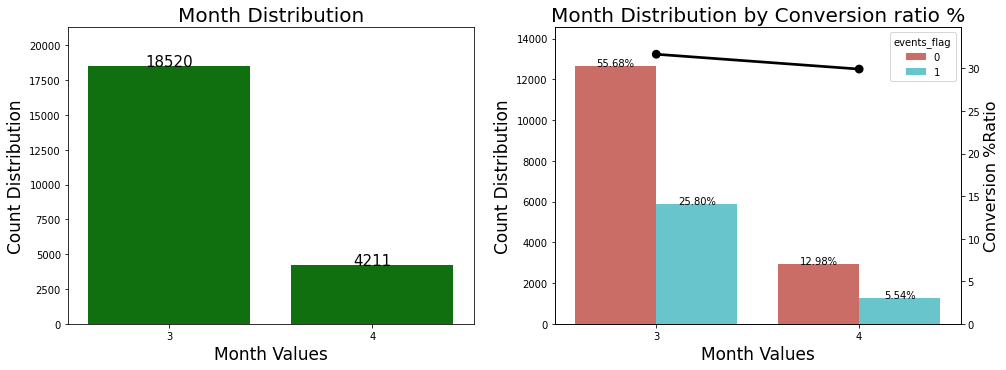

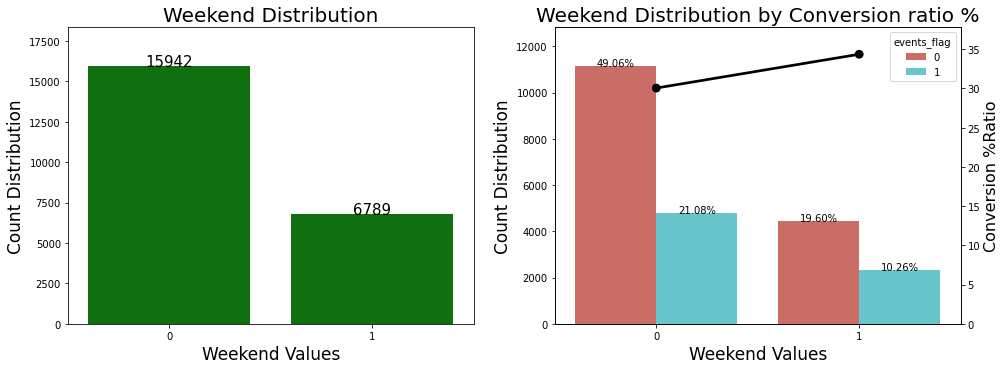

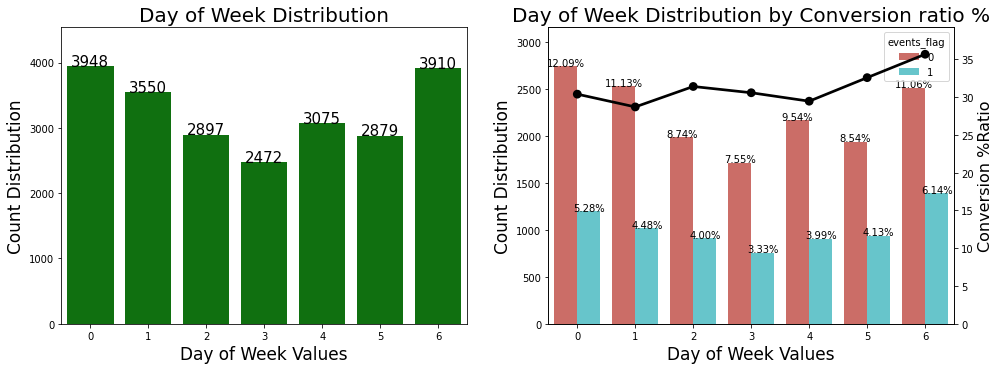

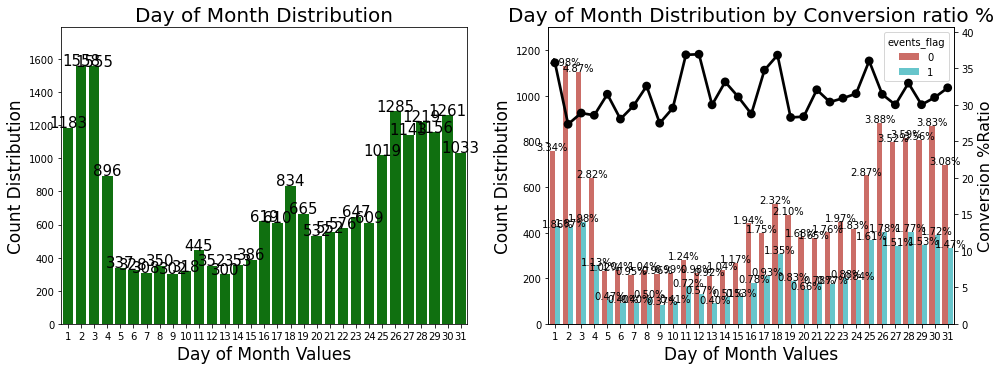

2021-10-13 04:27:11,954 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:11,979 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:11,982 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:11,985 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:12,628 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:12,658 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:12,660 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:12,661 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


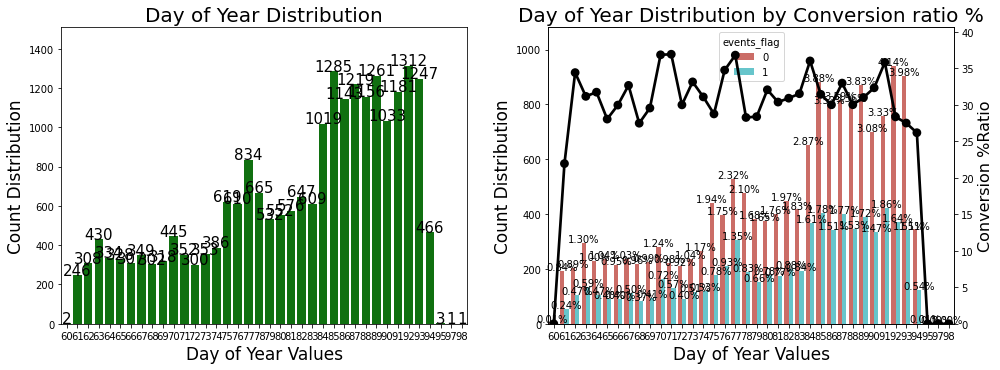

Plot
checkout.loaded event is complete!


In [289]:
FilterPlotDateEvent(data,'checkout.loaded')

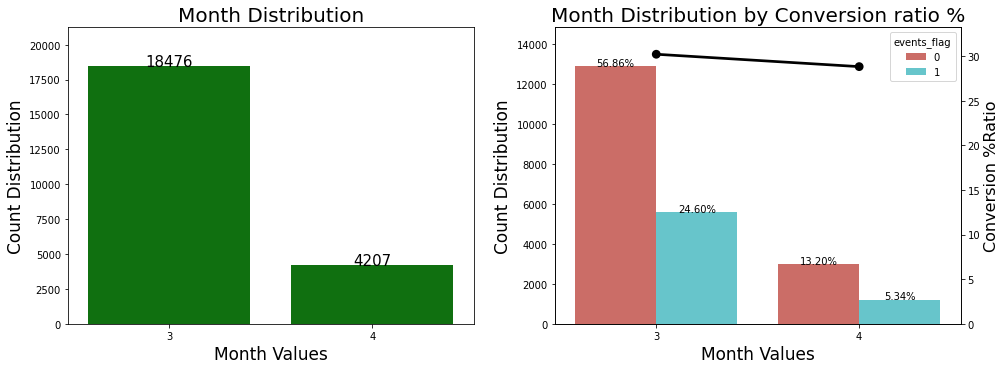

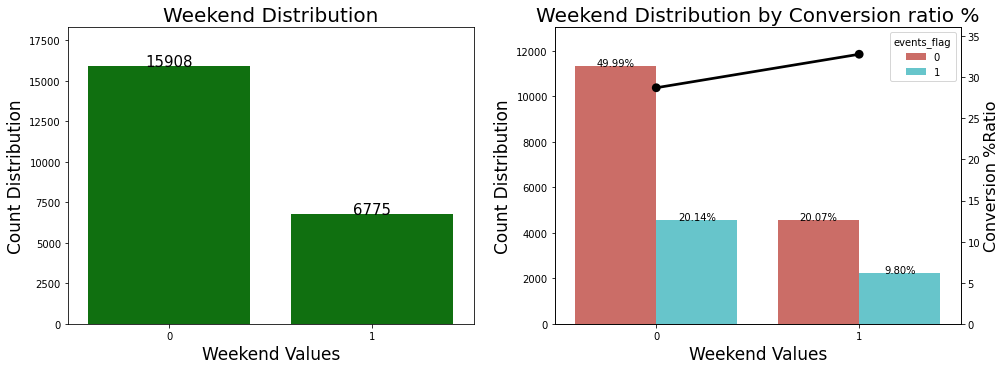

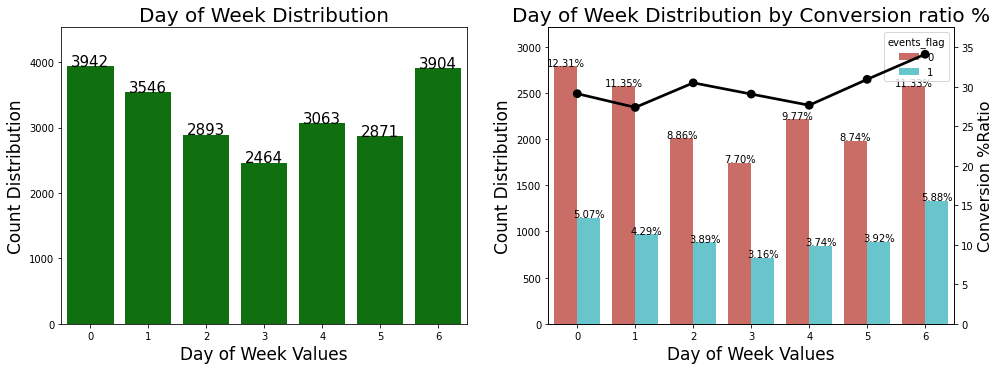

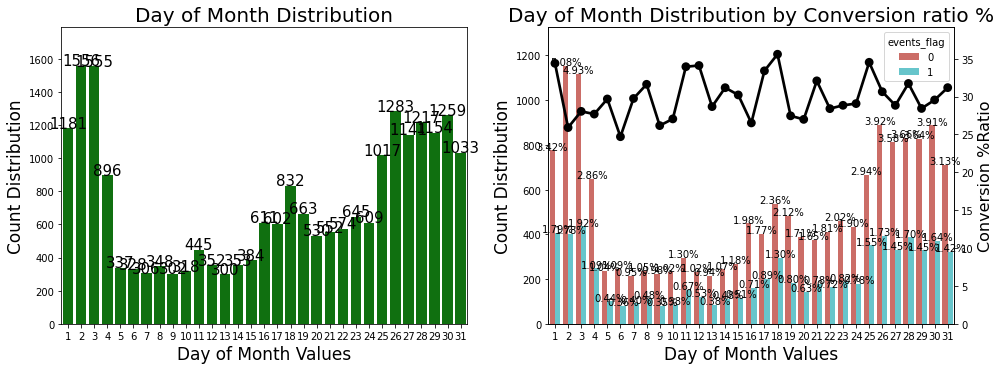

2021-10-13 04:27:16,986 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:17,009 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:17,011 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:17,013 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:17,669 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:17,695 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:17,697 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:17,701 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


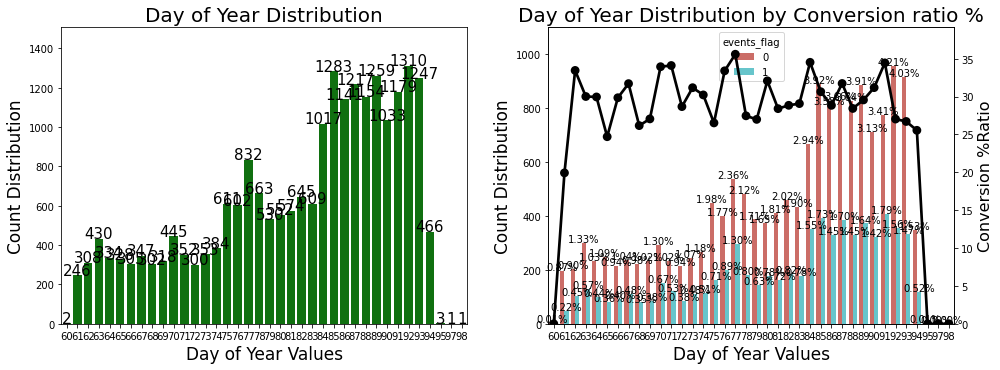

Plot
transaction event is complete!


In [290]:
FilterPlotDateEvent(data,'transaction')

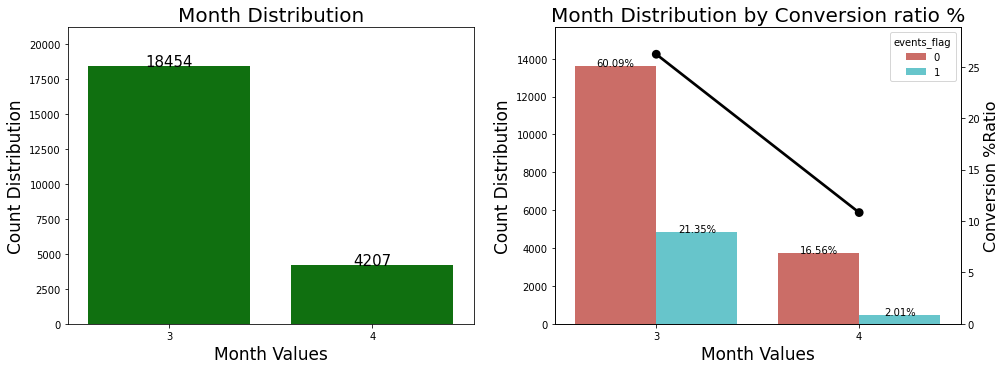

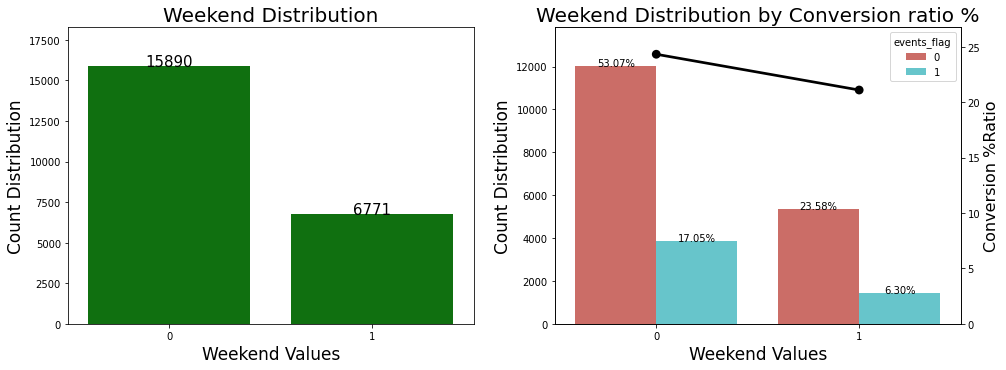

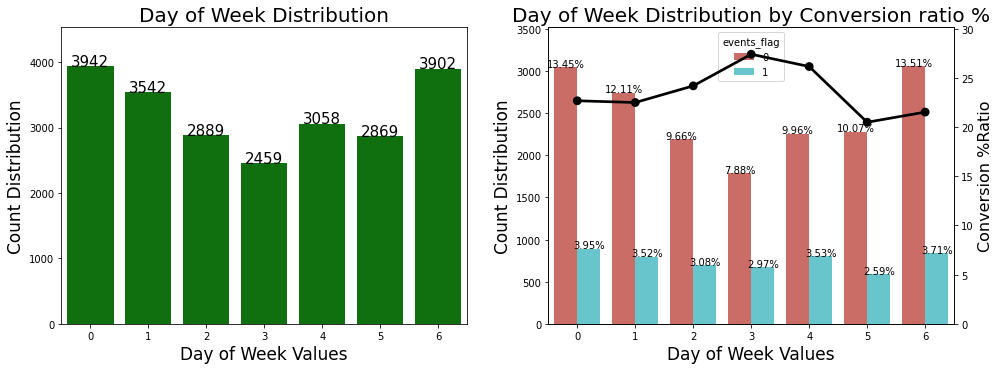

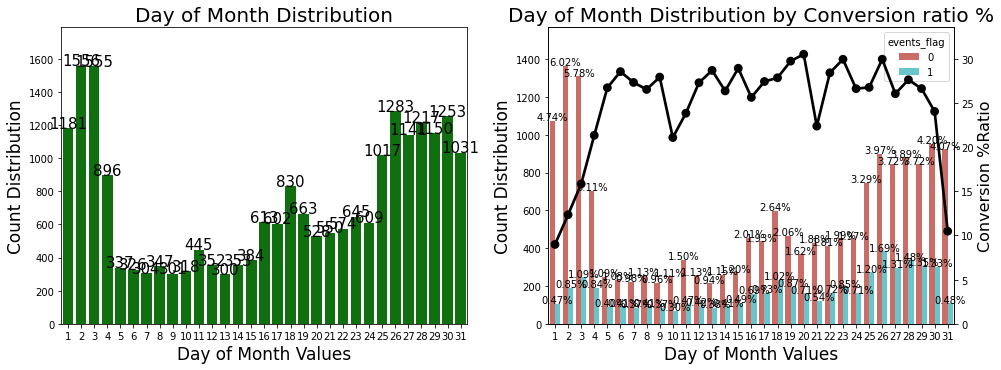

ValueError: Axis limits cannot be NaN or Inf

2021-10-13 04:27:22,111 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:22,164 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:22,167 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:22,169 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:22,957 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:23,021 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:23,023 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:27:23,025 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


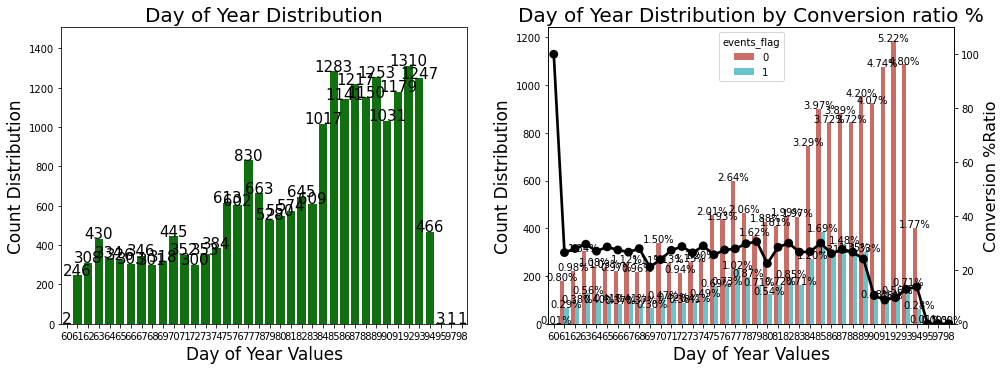

In [291]:
FilterPlotDateEvent(data,'suggested_popup.closed')

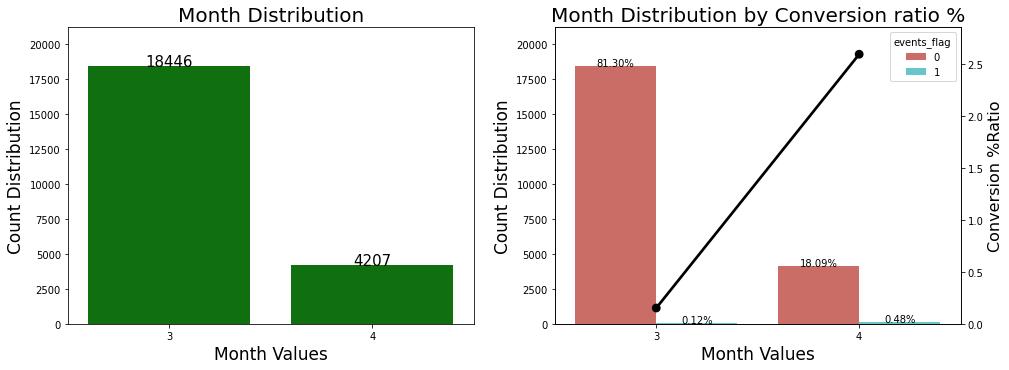

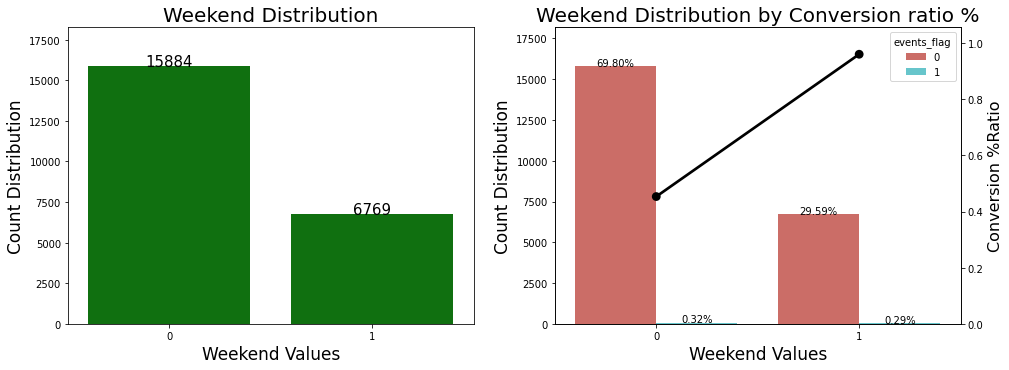

2021-10-13 04:28:08,395 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:08,536 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


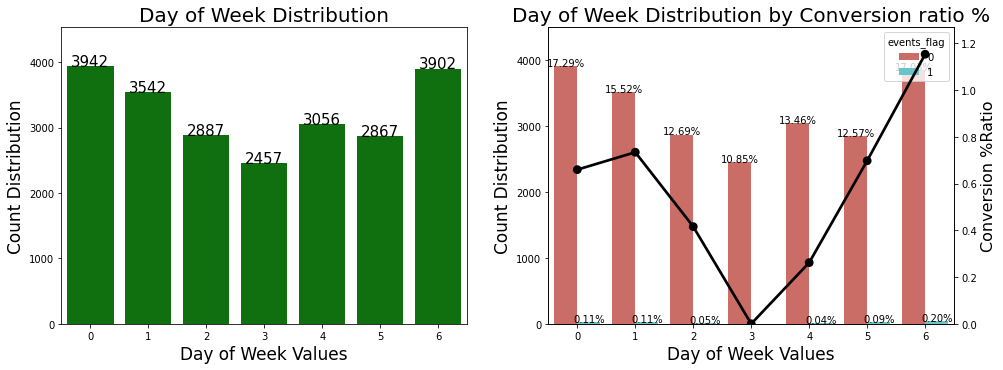

2021-10-13 04:28:10,087 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:10,094 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:10,096 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:10,099 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:10,101 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:10,103 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:10,105 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:10,107 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:10,109 [20128] WARNING  matplotlib.text:688: [J

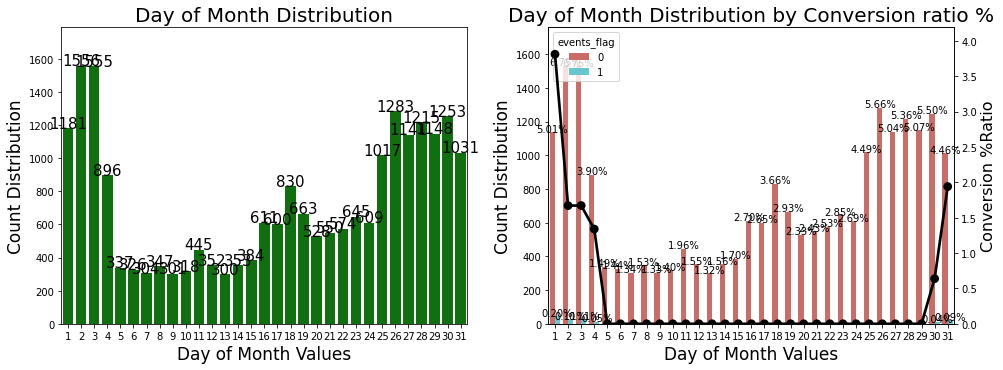

2021-10-13 04:28:11,675 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:11,680 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:11,682 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:11,684 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:11,686 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:11,688 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:11,690 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:11,692 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:11,696 [20128] WARNING  matplotlib.text:688: [J

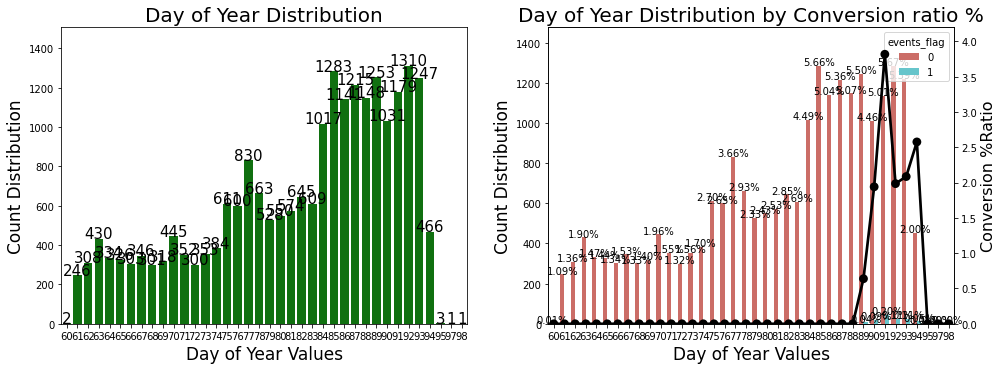

Plot
suggested_modal.shop_list.clicked event is complete!


In [292]:
FilterPlotDateEvent(data,'suggested_modal.shop_list.clicked')

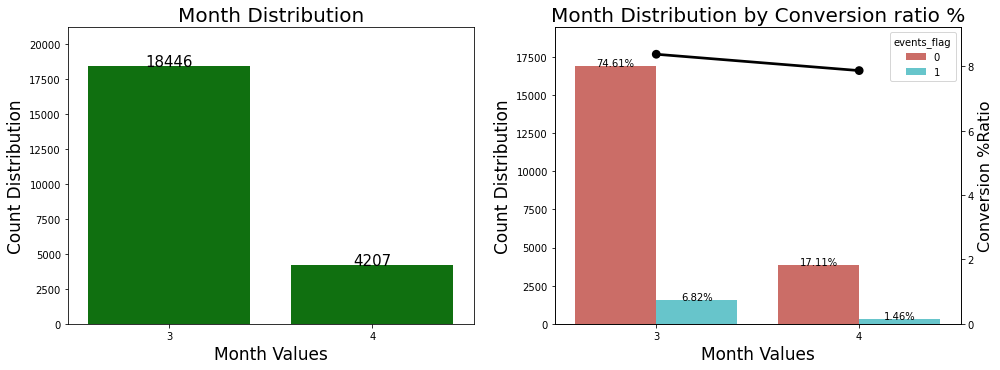

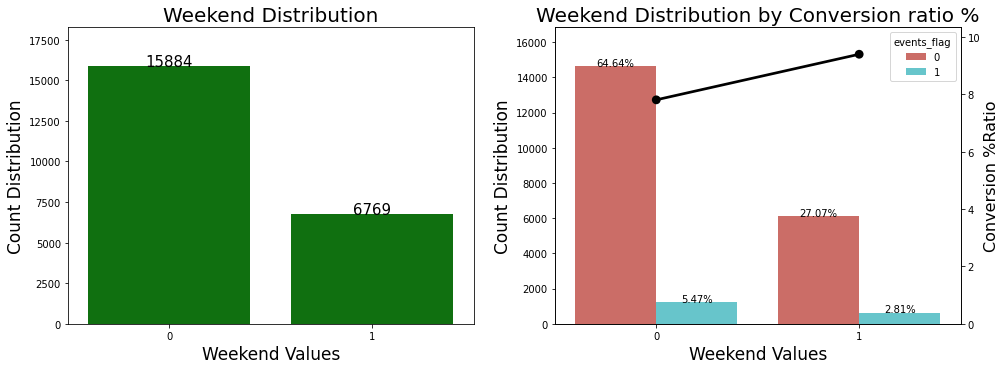

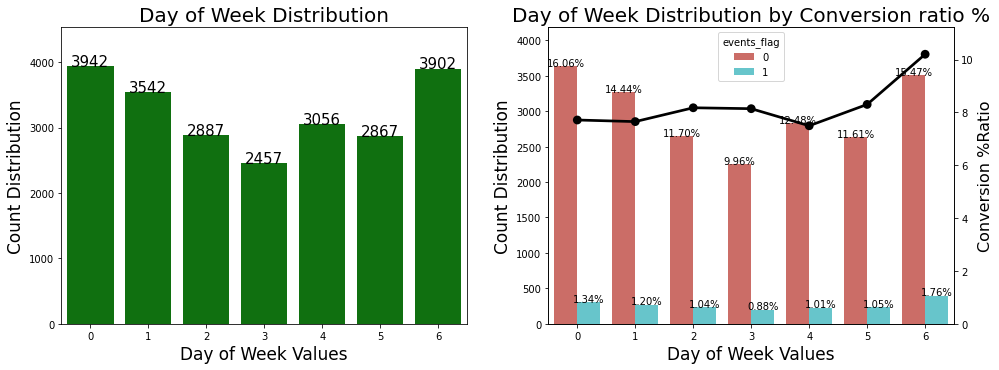

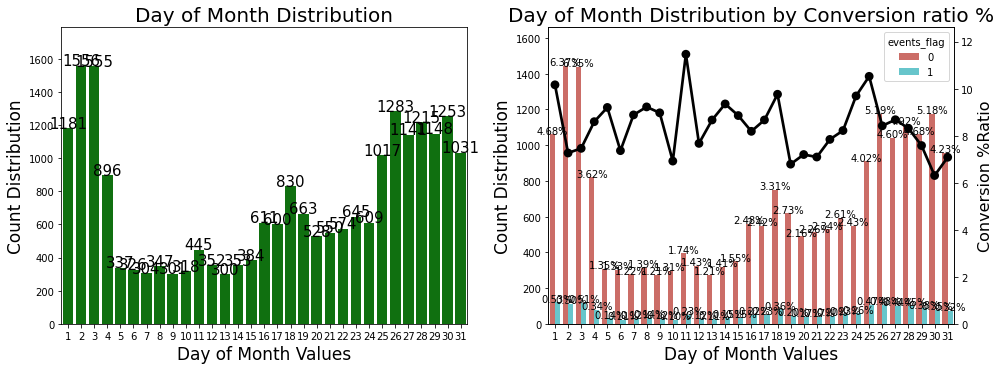

ValueError: Axis limits cannot be NaN or Inf

2021-10-13 04:28:16,702 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:16,741 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:16,742 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:16,744 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:17,329 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:17,381 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:17,385 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:28:17,387 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


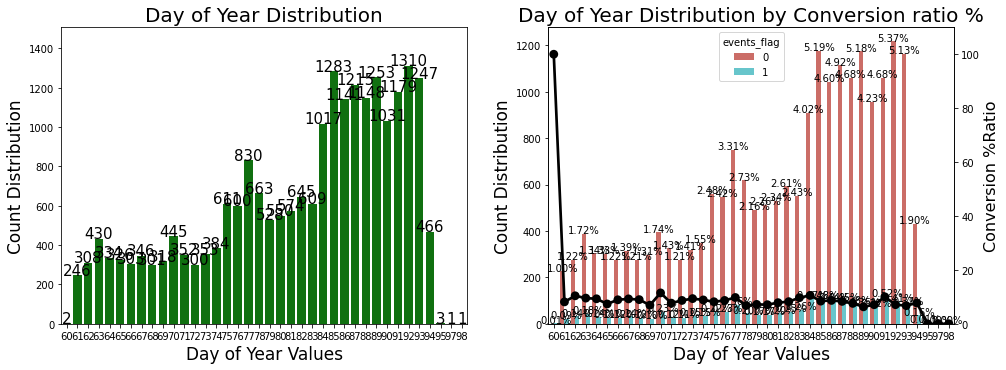

In [293]:
FilterPlotDateEvent(data,'suggested_shop.clicked')

### AB Testing per Event Pipeline

In [247]:
# function which will filter only event name transactions
'''Create function for filtering dataframe base on event key'''
def FilterEvent(df,event):
    df = df.copy()
    # apply filter
    df = df[df['event_key'] == event]
    return df

'''Create function for filtering out few July 2018 observations'''
def FilterOutMonth(df):
    df = df.copy()
    # apply filter
    df = df[df['date:month'] != 7]
    return df

'''Create function for filtering month'''
def FilterMonth(df,month):
    df = df.copy()
    # apply filter
    df = df[df['date:month'] == month]
    return df

'''Create a flag value for events'''
def FlagEvents(df):
    df = df.copy()
    # apply imputation
    df['events_flag'] = np.where((df['events'] > 1), 1 , df['events'])
    return df

'''Subset only certain columns for AB Testing'''
def ABTestSolution(df):
    df = df.copy()
    # select certain cols
    df = df[['session_id','event_name','variation_name','variation_binary','events_flag']].drop_duplicates()
    # test if number of rows equals to number of unique session_ids
    test = len(df) == len(df['session_id'].drop_duplicates())
    print("Unique of ids is: ")
    print(test)
    # check number of duplicate ids 
    df['cnt'] = AggCol(df,'session_id','session_id','count')
    df_dupl = df[df['cnt'] > 1]
    # print number of ids 
    print("Duplicate number of ids is: ")
    print(len(df_dupl['session_id'].drop_duplicates()))
    return df
    
'''Run flow for AB Testing each event seperately'''
def EventDF(df,event,month):
    df = df.copy()
    df = FilterEvent(df,event)
    if type(month) == int:
        df = FilterMonth(df,month)
    df = FlagEvents(df)
    df = ABTestSolution(df)
    return df
    
'''Create function to check distribution of event'''    
def PlotConversionRate(df, col=None, cont = None, binary=None, col_name = 'Variation', binary_name = None, dodge=True ):
    total = len(df)
    tmp = pd.crosstab(df[col], df[binary], normalize='index') * 100
    tmp = tmp.reset_index()

    plt.figure(figsize=(16,12))

    plt.subplot(221)
    g= sns.countplot(x=col, data=df, order=list(tmp[col].values) , color='green')
    g.set_title(f'{binary_name} Distribution', 
                fontsize=20)
    g.set_xlabel(f'{binary_name} Values',fontsize=17)
    g.set_ylabel('Count Distribution', fontsize=17)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.0f}'.format(height),
                ha="center", fontsize=15) 
    g.set_ylim(0,max(sizes)*1.15)

    plt.subplot(222)
    g1= sns.countplot(x=col, data=df, order=list(tmp[col].values),
                     hue=binary,palette="hls")
    g1.set_title(f'{binary_name} Distribution by Conversion ratio %', 
                fontsize=20)
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y=1, data=tmp, order=list(tmp[col].values),
                       color='black', legend=False)
    gt.set_ylim(0,tmp[1].max()*1.1)
    gt.set_ylabel("Conversion %Ratio", fontsize=16)
    g1.set_ylabel('Count Distribution',fontsize=17)
    g1.set_xlabel(f'{binary_name} Values', fontsize=17)
    
    sizes = []
    
    for p in g1.patches:
        height = p.get_height()
        sizes.append(height)
        g1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    g1.set_ylim(0,max(sizes)*1.15)
    
    plt.show()
    
'''AB Hypothesis Testing function'''    
def ABHypothesisTest(df,event,group,groupa,groupb):
    # 
    from statsmodels.stats.proportion import proportions_ztest, proportion_confint
    control_results = df[df[group] == groupa]['events_flag']
    treatment_results = df[df[group] == groupb]['events_flag']
    n_con = control_results.count()
    n_treat = treatment_results.count()
    successes = [control_results.sum(), treatment_results.sum()]
    nobs = [n_con, n_treat]

    z_stat, pval = proportions_ztest(successes, nobs=nobs)
    (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
    print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')
    
    # Result
    temp = pd.DataFrame({
        "Event":[event],
        "Group A":[groupa],
        "Group B":[groupb], 
        "p-value":[pval],
    })
    temp["AB Hypothesis"] = np.where(pval > 0.05, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "Variations are similar!", "Variations are not similar!")
    
    return temp

'''Check every AB testing for event'''
def ABEvent(df,event):
    # create all possible tests
    df_ab_hp1 = ABHypothesisTest(df,event,'variation_binary','Original','Variation')
    df_ab_hp2 = ABHypothesisTest(df,event,'variation_name','Original','Variation #1')
    df_ab_hp3 = ABHypothesisTest(df,event,'variation_name','Original','Variation #2')
    df_ab_hp4 = ABHypothesisTest(df,event,'variation_name','Variation #1','Variation #2')
    # merge frames together
    frames = [df_ab_hp1,df_ab_hp2,df_ab_hp3,df_ab_hp4]
    df_ab_hp = pd.concat(frames)
    return df_ab_hp


'''Plot every possible event'''
def PlotABEvent(df,binary_name):
    # create all possible tests
    PlotConversionRate(df, col='variation_binary', binary='events_flag',binary_name=binary_name,dodge=True)
    PlotConversionRate(df, col='variation_name', binary='events_flag',binary_name=binary_name,dodge=True)
    return print('Plot')


'''Function to perform AB Testing'''   
def ABTestFlow(df,event,month,binary_name):
    df_ab = EventDF(df,event,month)
    PlotABEvent(df_ab,binary_name)
    df_ab_event = ABEvent(df_ab,event)
    return df_ab, df_ab_event


### AB Test Work of action:

We will evaluate each of five events according to their conversion rate which is implemented via the event flag (1 if event happened in session 0 otherwise). <br> The evaluation will be done with A/B testing framework and we will check four cases each time (__Original vs Variation, Variation1 vs Variation2, Original vs Variation1, Original vs Variation2__).<br>
The objective is to evaluate if one solution among the three candidates improves the conversion rate for every respective event.<br>
When our p-value is above our α=0.05 threshold, we cannot reject the Null hypothesis Hₒ which means that the new variation did not perform significantly different than the old one.

<b> Possible events (EVENT) are:

__1)checkout.loaded__<br>
__2)transaction__<br>
__3)suggested_popup.closed__<br>
__4)suggested_modal.shop_list.clicked__<br> 
__5)suggested_shop.clicked__



<b> Possible name events (BINARY_NAME) are:

__1)checkout__<br>
__2)transaction__<br>
__3)suggested popup closed__<br>
__4)suggested shop list clicked__<br> 
__5)suggested shop clicked__



<b> Possible Group A,B (groupa,groupb) are:

__1)Original__<br>
__2)Variation 1__<br>
__3)Variation 2__<br>
__4)Variation__



### Checkout

First, we will evaluate if __checkout__ event has significantly been improved in any of the variations applied. <br>
Seems both __graphically__ and by __AB testing__ evaluation that no significant change appears in any of the variations. <br> 
No significant difference has been found between each month of activity.

Unique of ids is: 
False
Duplicate number of ids is: 
4


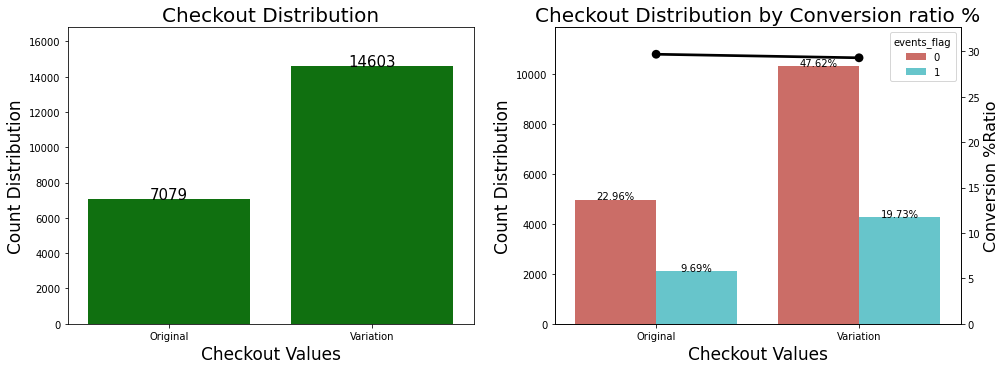

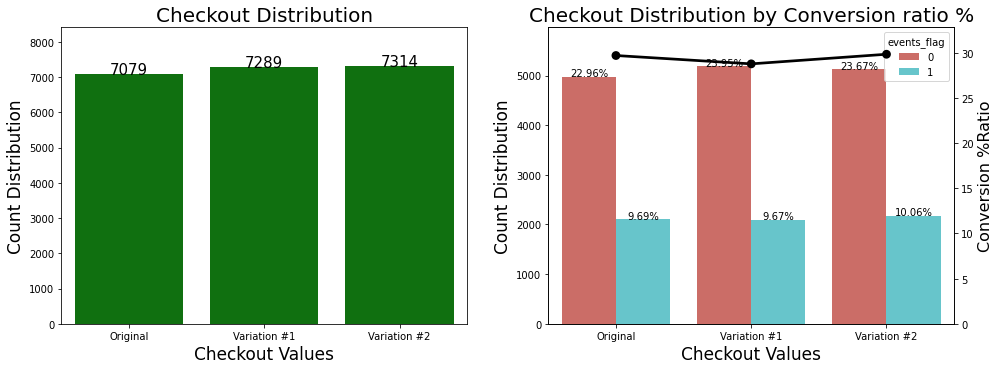

Plot
z statistic: 0.59
p-value: 0.554
ci 95% for control group: [0.286, 0.307]
ci 95% for treatment group: [0.286, 0.300]
z statistic: 1.22
p-value: 0.224
ci 95% for control group: [0.286, 0.307]
ci 95% for treatment group: [0.277, 0.298]
z statistic: -0.18
p-value: 0.854
ci 95% for control group: [0.286, 0.307]
ci 95% for treatment group: [0.288, 0.309]
z statistic: -1.41
p-value: 0.158
ci 95% for control group: [0.277, 0.298]
ci 95% for treatment group: [0.288, 0.309]


Event       Group A       Group B   p-value      AB Hypothesis  \
0  checkout.loaded      Original     Variation  0.553687  Fail to Reject H0   
0  checkout.loaded      Original  Variation #1  0.223503  Fail to Reject H0   
0  checkout.loaded      Original  Variation #2  0.854073  Fail to Reject H0   
0  checkout.loaded  Variation #1  Variation #2  0.157808  Fail to Reject H0   

                   Comment  
0  Variations are similar!  
0  Variations are similar!  
0  Variations are similar!  
0  Variations are similar!

In [279]:
EVENT = 'checkout.loaded'
MONTH = 'all'
BINARY_NAME = 'Checkout'


config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all

### Transaction

Next, we will evaluate if __transaction__ event has significantly been improved in any of the variations applied. <br>
Seems both __graphically__ and by __AB testing__ evaluation that no significant change appears in any of the variations. <br>
No significant difference has been found between each month of activity.

Unique of ids is: 
False
Duplicate number of ids is: 
4


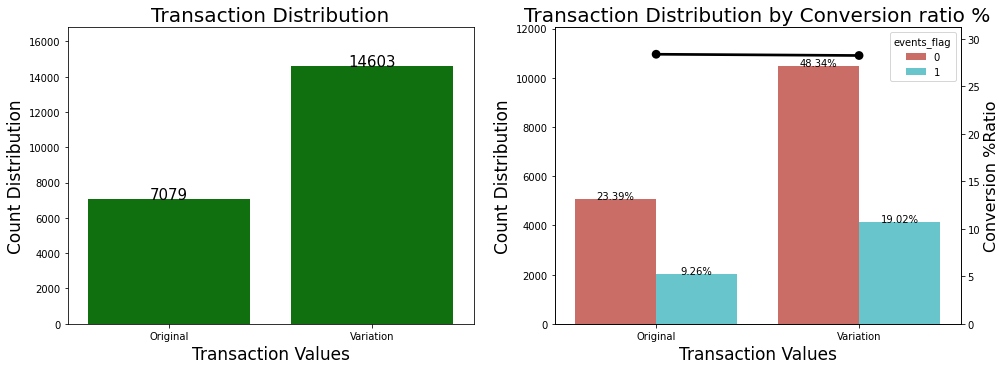

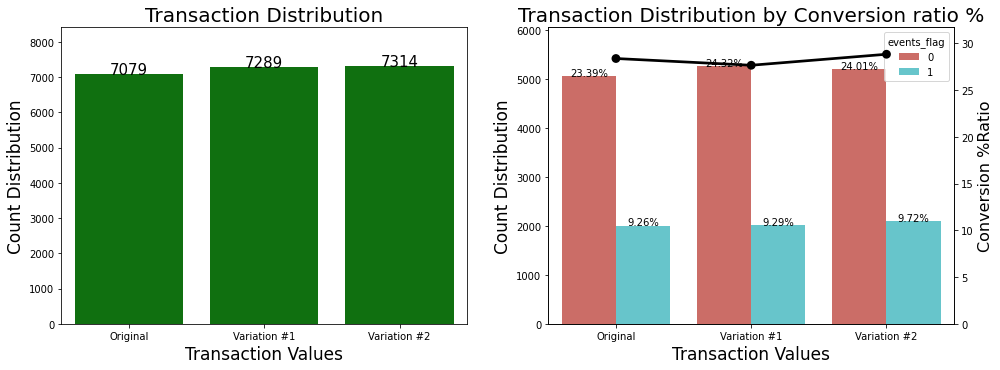

Plot
z statistic: 0.20
p-value: 0.840
ci 95% for control group: [0.273, 0.294]
ci 95% for treatment group: [0.275, 0.290]
z statistic: 0.96
p-value: 0.336
ci 95% for control group: [0.273, 0.294]
ci 95% for treatment group: [0.266, 0.287]
z statistic: -0.61
p-value: 0.545
ci 95% for control group: [0.273, 0.294]
ci 95% for treatment group: [0.278, 0.299]
z statistic: -1.58
p-value: 0.114
ci 95% for control group: [0.266, 0.287]
ci 95% for treatment group: [0.278, 0.299]


Event       Group A       Group B   p-value      AB Hypothesis  \
0  transaction      Original     Variation  0.840016  Fail to Reject H0   
0  transaction      Original  Variation #1  0.335767  Fail to Reject H0   
0  transaction      Original  Variation #2  0.545147  Fail to Reject H0   
0  transaction  Variation #1  Variation #2  0.114123  Fail to Reject H0   

                   Comment  
0  Variations are similar!  
0  Variations are similar!  
0  Variations are similar!  
0  Variations are similar!

In [280]:
EVENT = 'transaction'
MONTH = 'all'
BINARY_NAME = 'Transaction'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all

### Suggested Popup Closed

Next, we will evaluate if __Suggested Popup Closed__ event has significantly been improved in any of the variations applied. <br>
Obviously, in comparison to the previous two categories as the name suggests A/B testing can only be applied and evaluated to the two different alternatives to the Variation. <br>
Actually, it seems that Variation 2 in comparison to 1 has significantly __better__ conversion rate for the event of the suggested pop up closed. <br>
After examination we see that 03/2018 shows the __exactly opposite results__ compared to 04/2018 in terms of which variation produces the better conversion rate.

Unique of ids is: 
False
Duplicate number of ids is: 
4


2021-10-13 04:09:47,743 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:09:47,850 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


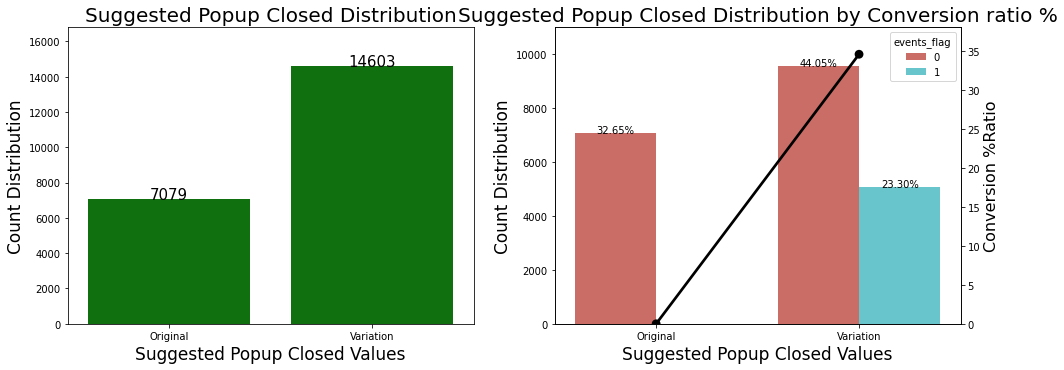

2021-10-13 04:09:48,689 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:09:48,808 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


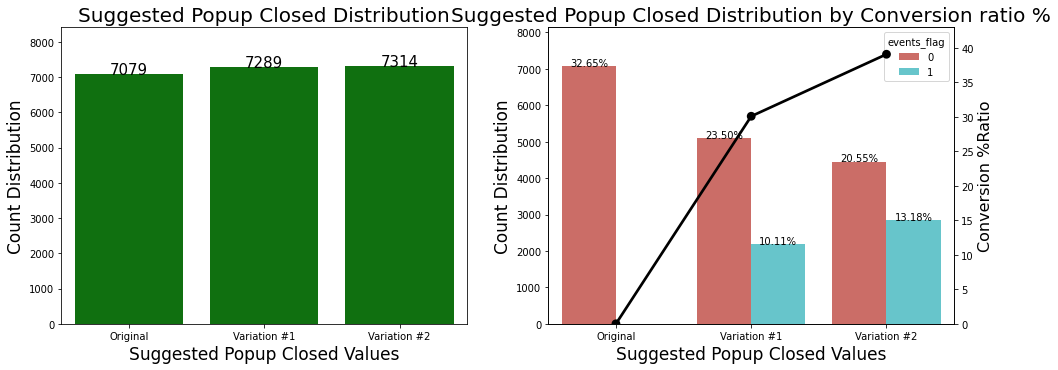

Plot
z statistic: -56.50
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.338, 0.354]
z statistic: -50.13
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.290, 0.311]
z statistic: -58.75
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.380, 0.402]
z statistic: -11.42
p-value: 0.000
ci 95% for control group: [0.290, 0.311]
ci 95% for treatment group: [0.380, 0.402]


Event       Group A       Group B       p-value  \
0  suggested_popup.closed      Original     Variation  0.000000e+00   
0  suggested_popup.closed      Original  Variation #1  0.000000e+00   
0  suggested_popup.closed      Original  Variation #2  0.000000e+00   
0  suggested_popup.closed  Variation #1  Variation #2  3.365761e-30   

  AB Hypothesis                      Comment  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!

In [281]:
EVENT = 'suggested_popup.closed'
MONTH = 'all'
BINARY_NAME = 'Suggested Popup Closed'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all

##### March 2018

Unique of ids is: 
False
Duplicate number of ids is: 
3


2021-10-13 04:10:05,957 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:10:06,066 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


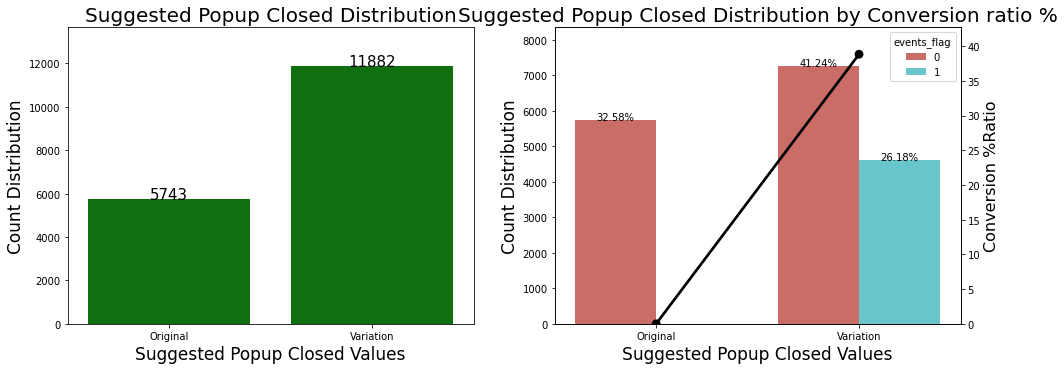

2021-10-13 04:10:06,741 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:10:06,843 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


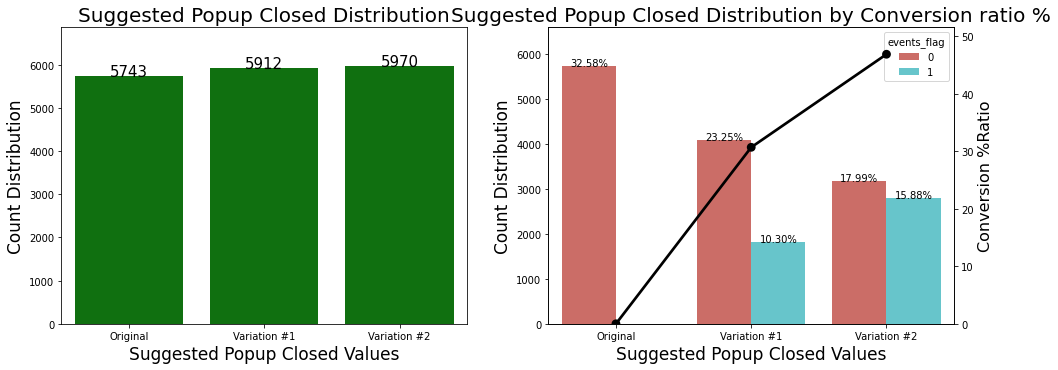

Plot
z statistic: -54.96
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.380, 0.397]
z statistic: -45.70
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.295, 0.319]
z statistic: -59.48
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.456, 0.482]
z statistic: -18.10
p-value: 0.000
ci 95% for control group: [0.295, 0.319]
ci 95% for treatment group: [0.456, 0.482]


Event       Group A       Group B       p-value  \
0  suggested_popup.closed      Original     Variation  0.000000e+00   
0  suggested_popup.closed      Original  Variation #1  0.000000e+00   
0  suggested_popup.closed      Original  Variation #2  0.000000e+00   
0  suggested_popup.closed  Variation #1  Variation #2  3.274028e-73   

  AB Hypothesis                      Comment  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!

In [282]:
EVENT = 'suggested_popup.closed'
MONTH = 3
BINARY_NAME = 'Suggested Popup Closed'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all

##### April 2018

Unique of ids is: 
False
Duplicate number of ids is: 
1


2021-10-13 04:10:23,634 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:10:23,745 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


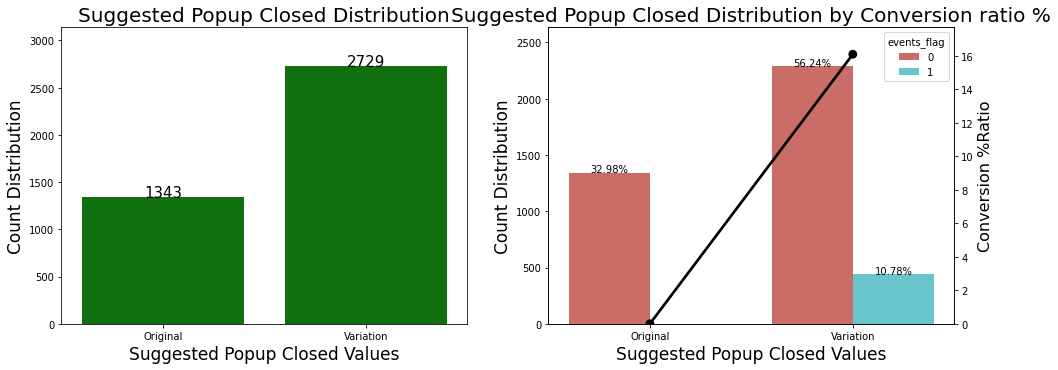

2021-10-13 04:10:24,026 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:10:24,123 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


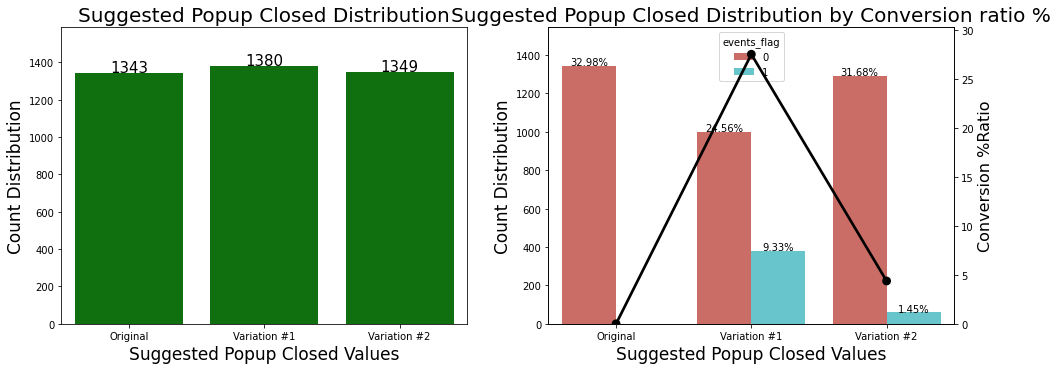

Plot
z statistic: -15.56
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.147, 0.175]
z statistic: -20.73
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.252, 0.299]
z statistic: -7.75
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.033, 0.055]
z statistic: 16.47
p-value: 0.000
ci 95% for control group: [0.252, 0.299]
ci 95% for treatment group: [0.033, 0.055]


Event       Group A       Group B       p-value  \
0  suggested_popup.closed      Original     Variation  1.338254e-54   
0  suggested_popup.closed      Original  Variation #1  1.805874e-95   
0  suggested_popup.closed      Original  Variation #2  9.230107e-15   
0  suggested_popup.closed  Variation #1  Variation #2  6.451533e-61   

  AB Hypothesis                      Comment  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!  
0     Reject H0  Variations are not similar!

In [283]:
EVENT = 'suggested_popup.closed'
MONTH = 4
BINARY_NAME = 'Suggested Popup Closed'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all

### Shop List Clicked

Next, we will evaluate if __Shop List Clicked__ event has significantly been improved in any of the variations applied. <br>
Obviously, in comparison to the previous two categories as the name suggests A/B testing can only be applied and evaluated to the two different alternatives to the Variation. <br>
Actually, it seems that __Variation 2__ in comparison to 1 has __not__ significantly __different__ conversion rate for the event of the shop list clicked.
No significant difference has been found between each month of activity.

Unique of ids is: 
False
Duplicate number of ids is: 
4


2021-10-13 04:16:23,727 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:16:23,829 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


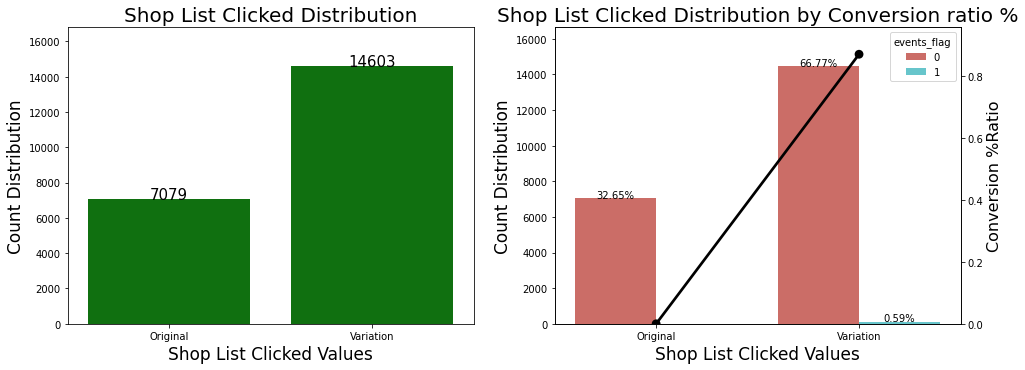

2021-10-13 04:16:24,592 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 04:16:24,703 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


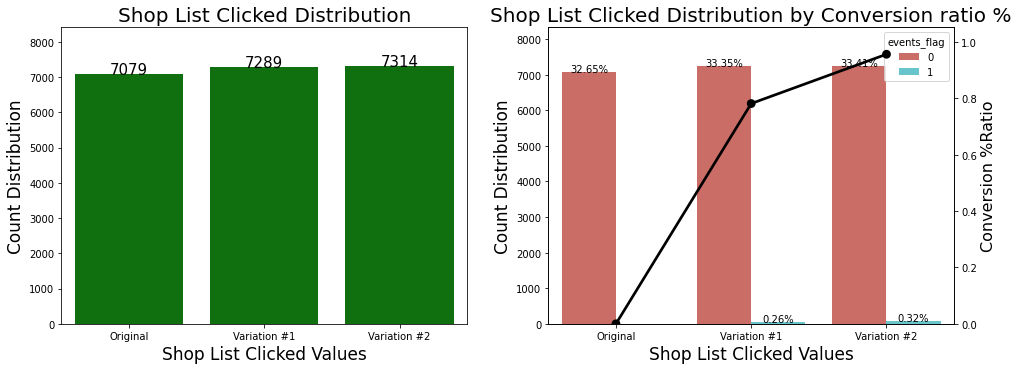

Plot
z statistic: -7.87
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.007, 0.010]
z statistic: -7.46
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.006, 0.010]
z statistic: -8.25
p-value: 0.000
ci 95% for control group: [0.000, 0.000]
ci 95% for treatment group: [0.007, 0.012]
z statistic: -1.14
p-value: 0.255
ci 95% for control group: [0.006, 0.010]
ci 95% for treatment group: [0.007, 0.012]


Event       Group A       Group B  \
0  suggested_modal.shop_list.clicked      Original     Variation   
0  suggested_modal.shop_list.clicked      Original  Variation #1   
0  suggested_modal.shop_list.clicked      Original  Variation #2   
0  suggested_modal.shop_list.clicked  Variation #1  Variation #2   

        p-value      AB Hypothesis                      Comment  
0  3.563043e-15          Reject H0  Variations are not similar!  
0  8.981017e-14          Reject H0  Variations are not similar!  
0  1.568355e-16          Reject H0  Variations are not similar!  
0  2.546044e-01  Fail to Reject H0      Variations are similar!

In [284]:
EVENT = 'suggested_modal.shop_list.clicked'
MONTH = 'all'
BINARY_NAME = 'Shop List Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all


### Suggested Shop Clicked

Next, we will evaluate if __Suggested Shop Clicked__ event has significantly been improved in any of the variations applied. <br>
Actually, it seems that __Variation 2__ in comparison to 1 and to the Original has significantly __better__ conversion rate for the event of the suggested shop clicked. <br>
After examination we see that in 04/2018 Variation 1 and 2 have no significant difference whereas 03/2018 they do and because 03/2018 has more observations the whole comparison is driven from this month.

Unique of ids is: 
False
Duplicate number of ids is: 
4


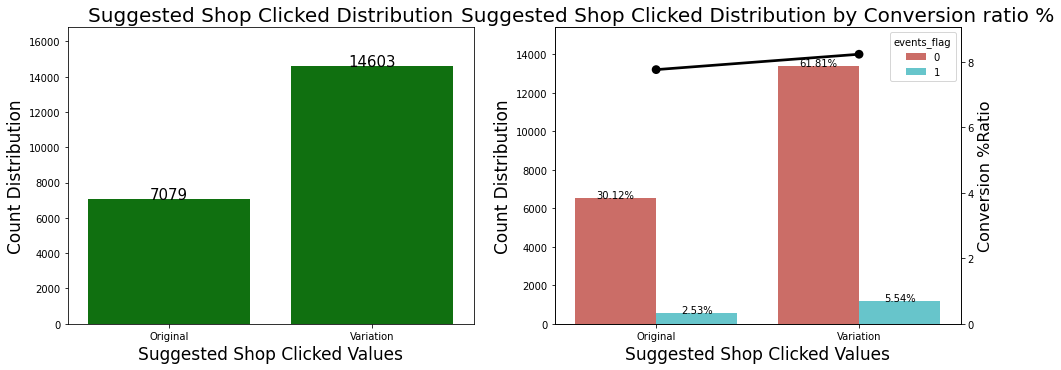

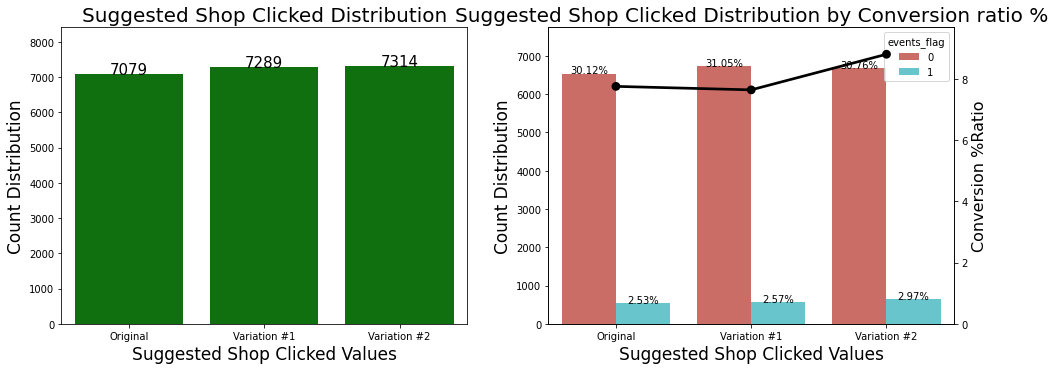

Plot
z statistic: -1.19
p-value: 0.234
ci 95% for control group: [0.071, 0.084]
ci 95% for treatment group: [0.078, 0.087]
z statistic: 0.26
p-value: 0.798
ci 95% for control group: [0.071, 0.084]
ci 95% for treatment group: [0.070, 0.083]
z statistic: -2.28
p-value: 0.022
ci 95% for control group: [0.071, 0.084]
ci 95% for treatment group: [0.082, 0.095]
z statistic: -2.56
p-value: 0.011
ci 95% for control group: [0.070, 0.083]
ci 95% for treatment group: [0.082, 0.095]


Event       Group A       Group B   p-value  \
0  suggested_shop.clicked      Original     Variation  0.234485   
0  suggested_shop.clicked      Original  Variation #1  0.798277   
0  suggested_shop.clicked      Original  Variation #2  0.022402   
0  suggested_shop.clicked  Variation #1  Variation #2  0.010510   

       AB Hypothesis                      Comment  
0  Fail to Reject H0      Variations are similar!  
0  Fail to Reject H0      Variations are similar!  
0          Reject H0  Variations are not similar!  
0          Reject H0  Variations are not similar!

In [285]:
EVENT = 'suggested_shop.clicked'
MONTH = 'all'
BINARY_NAME = 'Suggested Shop Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all

##### March 2018

Unique of ids is: 
False
Duplicate number of ids is: 
3


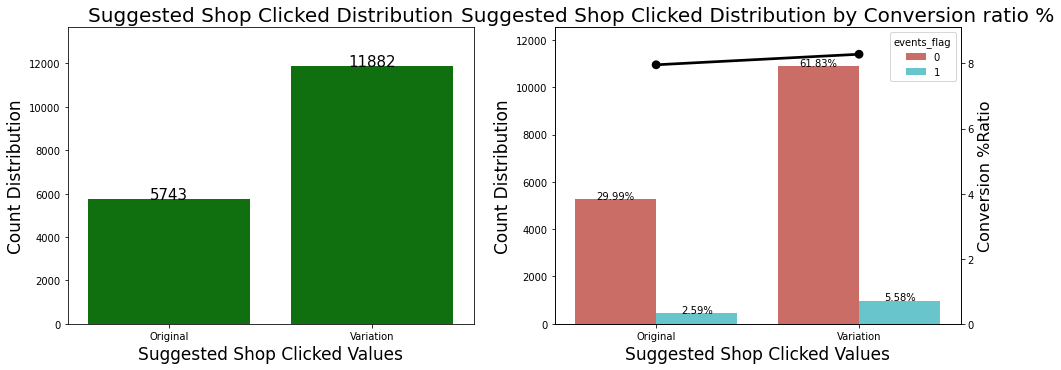

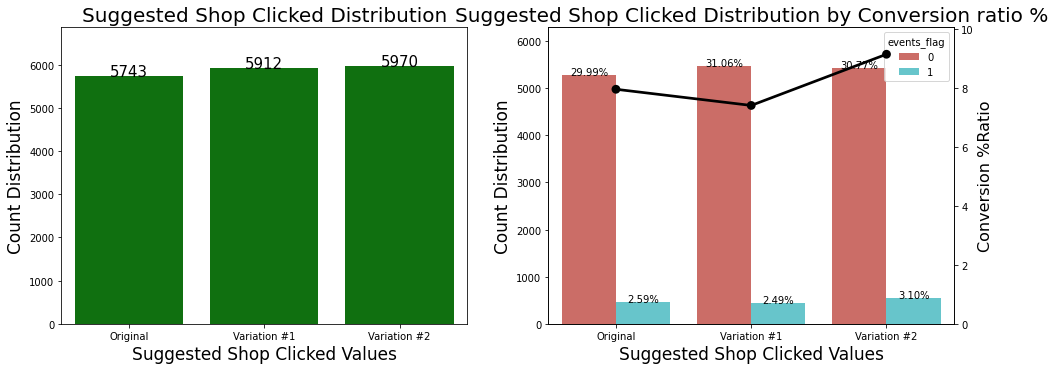

Plot
z statistic: -0.74
p-value: 0.462
ci 95% for control group: [0.073, 0.087]
ci 95% for treatment group: [0.078, 0.088]
z statistic: 1.11
p-value: 0.266
ci 95% for control group: [0.073, 0.087]
ci 95% for treatment group: [0.067, 0.081]
z statistic: -2.30
p-value: 0.022
ci 95% for control group: [0.073, 0.087]
ci 95% for treatment group: [0.084, 0.099]
z statistic: -3.44
p-value: 0.001
ci 95% for control group: [0.067, 0.081]
ci 95% for treatment group: [0.084, 0.099]


Event       Group A       Group B   p-value  \
0  suggested_shop.clicked      Original     Variation  0.461973   
0  suggested_shop.clicked      Original  Variation #1  0.265889   
0  suggested_shop.clicked      Original  Variation #2  0.021595   
0  suggested_shop.clicked  Variation #1  Variation #2  0.000592   

       AB Hypothesis                      Comment  
0  Fail to Reject H0      Variations are similar!  
0  Fail to Reject H0      Variations are similar!  
0          Reject H0  Variations are not similar!  
0          Reject H0  Variations are not similar!

In [286]:
EVENT = 'suggested_shop.clicked'
MONTH = 3
BINARY_NAME = 'Suggested Shop Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all

##### April 2018

Unique of ids is: 
False
Duplicate number of ids is: 
1


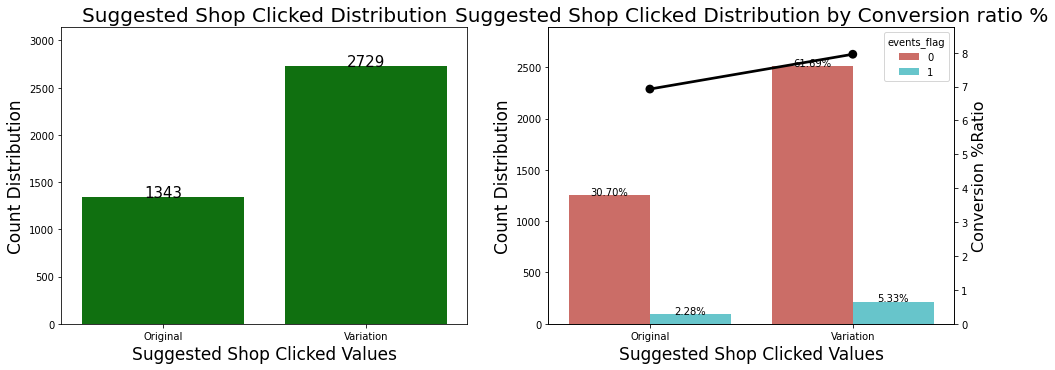

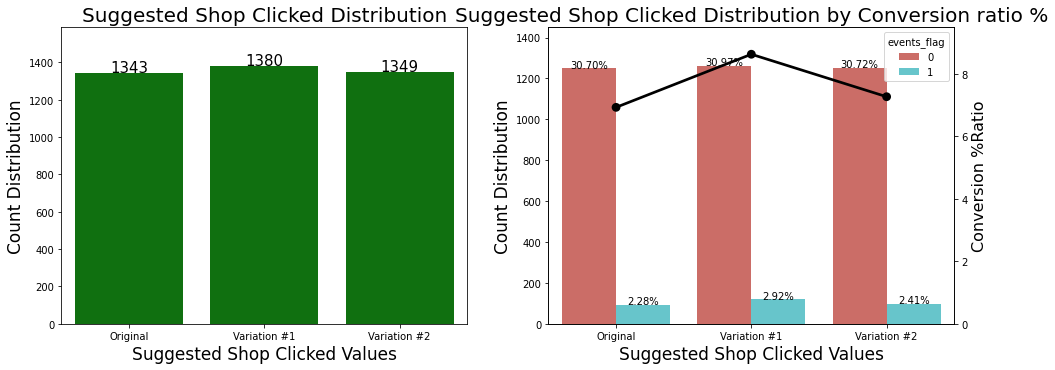

Plot
z statistic: -1.16
p-value: 0.245
ci 95% for control group: [0.056, 0.083]
ci 95% for treatment group: [0.069, 0.090]
z statistic: -1.65
p-value: 0.098
ci 95% for control group: [0.056, 0.083]
ci 95% for treatment group: [0.071, 0.101]
z statistic: -0.34
p-value: 0.731
ci 95% for control group: [0.056, 0.083]
ci 95% for treatment group: [0.059, 0.086]
z statistic: 1.31
p-value: 0.190
ci 95% for control group: [0.071, 0.101]
ci 95% for treatment group: [0.059, 0.086]


Event       Group A       Group B   p-value  \
0  suggested_shop.clicked      Original     Variation  0.245401   
0  suggested_shop.clicked      Original  Variation #1  0.098195   
0  suggested_shop.clicked      Original  Variation #2  0.731304   
0  suggested_shop.clicked  Variation #1  Variation #2  0.189674   

       AB Hypothesis                  Comment  
0  Fail to Reject H0  Variations are similar!  
0  Fail to Reject H0  Variations are similar!  
0  Fail to Reject H0  Variations are similar!  
0  Fail to Reject H0  Variations are similar!

In [287]:
EVENT = 'suggested_shop.clicked'
MONTH = 4
BINARY_NAME = 'Suggested Shop Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlow(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["BINARY_NAME"])

df_ab_all

### AB Testing per Category Pipeline

In [393]:
'''Subset only certain columns for AB Testing'''
def ABTestSolutionCat(df,col):
    df = df.copy()
    # select certain cols
    df = df[['session_id','event_name',col,'events_flag']].drop_duplicates()
    # test if number of rows equals to number of unique session_ids
    test = len(df) == len(df['session_id'].drop_duplicates())
    print("Unique of ids is: ")
    print(test)
    # check number of duplicate ids 
    df['cnt'] = AggCol(df,'session_id','session_id','count')
    df_dupl = df[df['cnt'] > 1]
    # print number of ids 
    print("Duplicate number of ids is: ")
    print(len(df_dupl['session_id'].drop_duplicates()))
    return df


'''Check every AB testing for event'''
def ABEventTypeCat(df,event,col):
    # create all possible tests
    if col == 'visitType':
        df_ab_hp = ABHypothesisTestCat(df,event,col,'Returning Visit','New Visit')
    elif col == 'landingPage':
        df_ab_hp1 = ABHypothesisTestCat(df,event,col,'home','shop_details')
        df_ab_hp2 = ABHypothesisTestCat(df,event,col,'home','shop_list')
        df_ab_hp3 = ABHypothesisTestCat(df,event,col,'home','other')
        df_ab_hp4 = ABHypothesisTestCat(df,event,col,'shop_details','shop_list')
        df_ab_hp5 = ABHypothesisTestCat(df,event,col,'shop_details','other')
        df_ab_hp6 = ABHypothesisTestCat(df,event,col,'shop_list','other')
        frames = [df_ab_hp1,df_ab_hp2,df_ab_hp3,df_ab_hp4,df_ab_hp5,df_ab_hp6]
        df_ab_hp = pd.concat(frames)
    elif col == 'source':
        df_ab_hp1 = ABHypothesisTest(df,event,col,'google',"(direct)")
        df_ab_hp2 = ABHypothesisTest(df,event,col,'google','other')
        df_ab_hp3 = ABHypothesisTest(df,event,col,"(direct)",'other')   
        frames = [df_ab_hp1,df_ab_hp2,df_ab_hp3]
        df_ab_hp = pd.concat(frames)
    elif col == 'appBrowser':
        df_ab_hp1 = ABHypothesisTestCat(df,event,col,'Chrome','Firefox')
        df_ab_hp2 = ABHypothesisTestCat(df,event,col,'Chrome','other')
        df_ab_hp3 = ABHypothesisTestCat(df,event,col,'Firefox','other')   
        frames = [df_ab_hp1,df_ab_hp2,df_ab_hp3]
        df_ab_hp = pd.concat(frames)
    elif col == 'medium':
        df_ab_hp1 = ABHypothesisTestCat(df,event,col,'organic','cpc')
        df_ab_hp2 = ABHypothesisTestCat(df,event,col,'organic','other')
        df_ab_hp3 = ABHypothesisTestCat(df,event,col,'organic',"(none)")   
        df_ab_hp4 = ABHypothesisTestCat(df,event,col,'cpc',"(none)")
        df_ab_hp5 = ABHypothesisTestCat(df,event,col,'cpc','other')
        df_ab_hp6 = ABHypothesisTestCat(df,event,col,"(none)",'other')
        frames = [df_ab_hp1,df_ab_hp2,df_ab_hp3,df_ab_hp4,df_ab_hp5,df_ab_hp6]
        df_ab_hp = pd.concat(frames)

    return df_ab_hp


'''AB Hypothesis Testing function'''    
def ABHypothesisTestCat(df,event,group,groupa,groupb):
    # 
    from statsmodels.stats.proportion import proportions_ztest, proportion_confint
    control_results = df[df[group] == groupa]['events_flag']
    treatment_results = df[df[group] == groupb]['events_flag']
    n_con = control_results.count()
    n_treat = treatment_results.count()
    successes = [control_results.sum(), treatment_results.sum()]
    nobs = [n_con, n_treat]

    z_stat, pval = proportions_ztest(successes, nobs=nobs)
    (lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

    print(f'z statistic: {z_stat:.2f}')
    print(f'p-value: {pval:.3f}')
    print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
    print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')
    
    # Result
    temp = pd.DataFrame({
        "Event":[event],
        "Group A":[groupa],
        "Group B":[groupb], 
        "p-value":[pval],
    })
    temp["AB Hypothesis"] = np.where(pval > 0.05, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "Groups are similar!", "Groups are not similar!")
    
    return temp


'''Run flow for AB Testing each event seperately'''
def EventDFCat(df,event,month,col):
    df = df.copy()
    df = FilterEvent(df,event)
    if type(month) == int:
        df = FilterMonth(df,month)
    df = FlagEvents(df)
    df = ABTestSolutionCat(df,col)
    return df


'''Create function to check distribution of event'''    
def PlotConversionRateCat(df, col=None, cont = None, binary=None, col_name = 'Variation', binary_name = None, dodge=True ):
    total = len(df)
    tmp = pd.crosstab(df[col], df[binary], normalize='index') * 100
    tmp = tmp.reset_index()

    plt.figure(figsize=(16,12))

    plt.subplot(221)
    g= sns.countplot(x=col, data=df, order=list(tmp[col].values) , color='green')
    g.set_title(f'{binary_name} Distribution', 
                fontsize=20)
    g.set_xlabel(f'{binary_name} Values',fontsize=17)
    g.set_ylabel('Count Distribution', fontsize=17)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.0f}'.format(height),
                ha="center", fontsize=15) 
    g.set_ylim(0,max(sizes)*1.15)

    plt.subplot(222)
    g1= sns.countplot(x=col, data=df, order=list(tmp[col].values),
                     hue=binary,palette="hls")
    g1.set_title(f'{binary_name} Distribution by Conversion ratio %', 
                fontsize=20)
    gt = g1.twinx()
    gt = sns.pointplot(x=col, y=1, data=tmp, order=list(tmp[col].values),
                       color='black', legend=False)
    gt.set_ylim(0,tmp[1].max()*1.1)
    gt.set_ylabel("Conversion %Ratio", fontsize=16)
    g1.set_ylabel('Count Distribution',fontsize=17)
    g1.set_xlabel(f'{binary_name} Values', fontsize=17)
    
    sizes = []
    
    for p in g1.patches:
        height = p.get_height()
        sizes.append(height)
        g1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    g1.set_ylim(0,max(sizes)*1.15)
    
    plt.show()

'''Plot every possible event'''
def PlotABEventCat(df,binary_name,col):
    # create all possible tests
    PlotConversionRate(df, col=col, binary='events_flag',binary_name=binary_name,dodge=True)
    return print('Plot')



'''Function to perform AB Testing'''   
def ABTestFlowCat(df,event,month,col,binary_name):
    df_ab = EventDFCat(df,event,month,col)
    PlotABEventCat(df_ab,binary_name,col)
    df_ab_event = ABEventTypeCat(df_ab,event,col)
    return df_ab, df_ab_event

### visitType

Besides the __Suggested Shop clicked__ event __returning customers__ have a higher conversion rate than the __new__ ones in every event.

Unique of ids is: 
True
Duplicate number of ids is: 
0


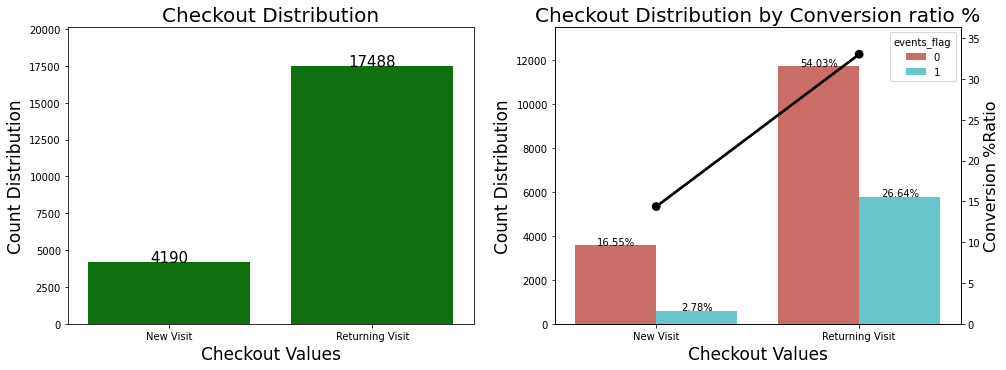

Plot
z statistic: 23.81
p-value: 0.000
ci 95% for control group: [0.323, 0.337]
ci 95% for treatment group: [0.133, 0.154]


Event          Group A    Group B        p-value AB Hypothesis  \
0  checkout.loaded  Returning Visit  New Visit  2.736241e-125     Reject H0   

                   Comment  
0  Groups are not similar!

In [352]:
EVENT = 'checkout.loaded'
MONTH = 'all'
COL = 'visitType'
BINARY_NAME = 'Checkout'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


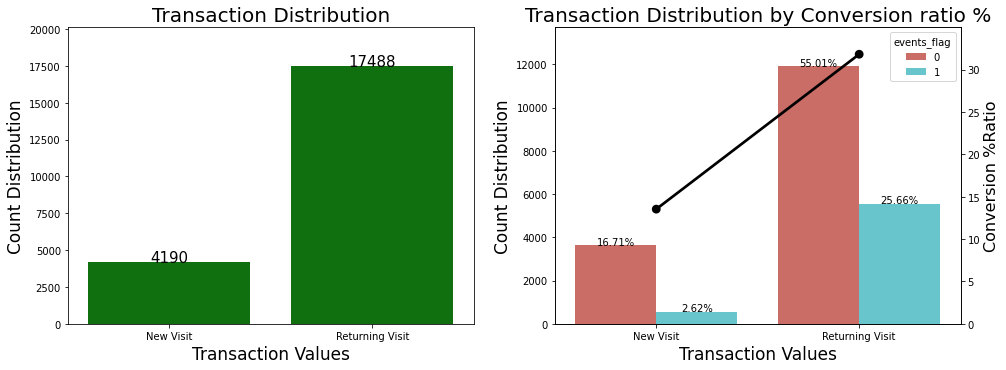

Plot
z statistic: 23.60
p-value: 0.000
ci 95% for control group: [0.311, 0.325]
ci 95% for treatment group: [0.125, 0.146]


Event          Group A    Group B        p-value AB Hypothesis  \
0  transaction  Returning Visit  New Visit  4.164143e-123     Reject H0   

                   Comment  
0  Groups are not similar!

In [353]:
EVENT = 'transaction'
MONTH = 'all'
COL = 'visitType'
BINARY_NAME = 'Transaction'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


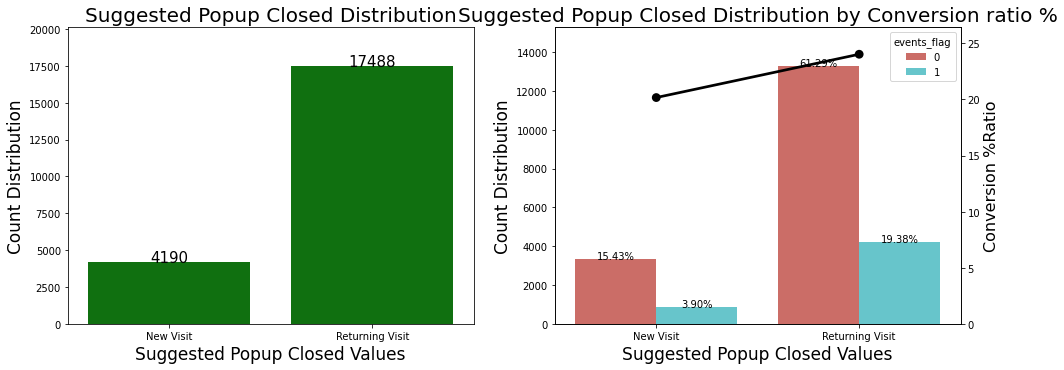

Plot
z statistic: 5.31
p-value: 0.000
ci 95% for control group: [0.234, 0.247]
ci 95% for treatment group: [0.190, 0.214]


Event          Group A    Group B       p-value  \
0  suggested_popup.closed  Returning Visit  New Visit  1.089054e-07   

  AB Hypothesis                  Comment  
0     Reject H0  Groups are not similar!

In [354]:
EVENT = 'suggested_popup.closed'
MONTH = 'all'
COL = 'visitType'
BINARY_NAME = 'Suggested Popup Closed'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


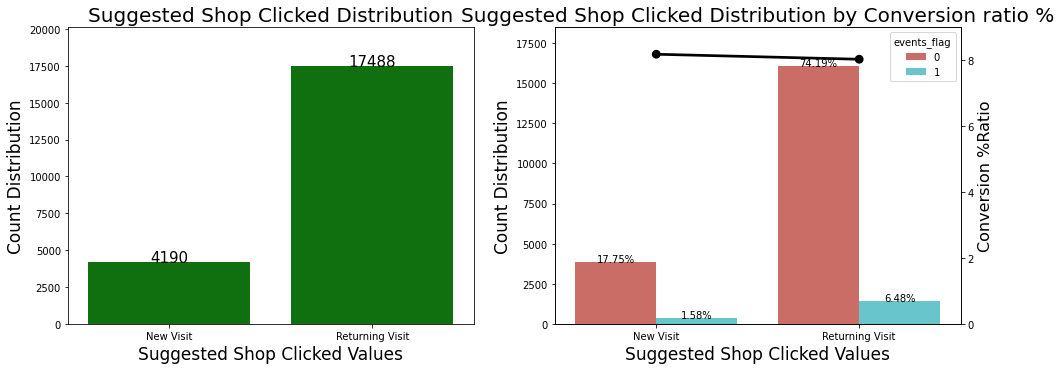

Plot
z statistic: -0.32
p-value: 0.745
ci 95% for control group: [0.076, 0.084]
ci 95% for treatment group: [0.074, 0.090]


Event          Group A    Group B   p-value  \
0  suggested_shop.clicked  Returning Visit  New Visit  0.745383   

       AB Hypothesis              Comment  
0  Fail to Reject H0  Groups are similar!

In [355]:
EVENT = 'suggested_shop.clicked'
MONTH = 'all'
COL = 'visitType'
BINARY_NAME = 'Suggested Shop Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


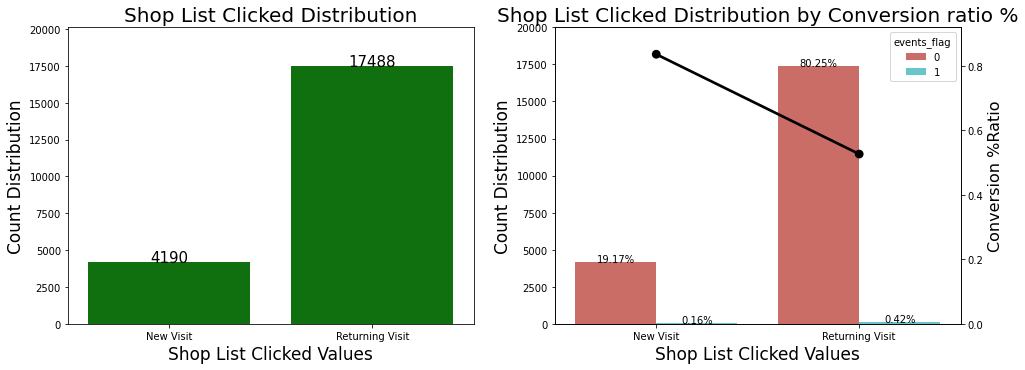

Plot
z statistic: -2.36
p-value: 0.018
ci 95% for control group: [0.004, 0.006]
ci 95% for treatment group: [0.006, 0.011]


Event          Group A    Group B   p-value  \
0  suggested_modal.shop_list.clicked  Returning Visit  New Visit  0.018478   

  AB Hypothesis                  Comment  
0     Reject H0  Groups are not similar!

In [356]:
EVENT = 'suggested_modal.shop_list.clicked'
MONTH = 'all'
COL = 'visitType'
BINARY_NAME = 'Shop List Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

### landingPage

__1__ Session ids with __Home__ as landing page have a higher conversion rate than __shop details__ and __shop list__ in __checkout,transaction and suggested popup closed__ events. <br>
__2__ In contrast, __shop list__ has a significantly higher conversion rate than __shop details__ and __Home__ landing page in __Suggested Shop Clicked__ event.

Unique of ids is: 
False
Duplicate number of ids is: 
304


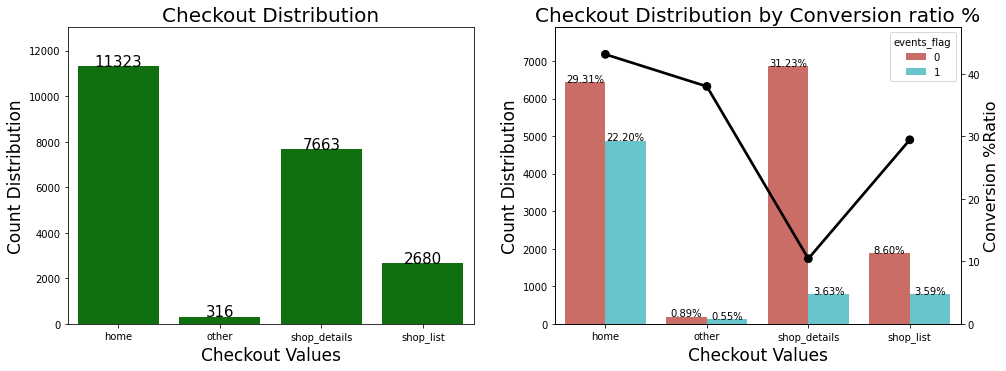

Plot
z statistic: 48.25
p-value: 0.000
ci 95% for control group: [0.422, 0.440]
ci 95% for treatment group: [0.097, 0.111]
z statistic: 12.96
p-value: 0.000
ci 95% for control group: [0.422, 0.440]
ci 95% for treatment group: [0.277, 0.312]
z statistic: 1.82
p-value: 0.069
ci 95% for control group: [0.422, 0.440]
ci 95% for treatment group: [0.326, 0.433]
z statistic: -23.50
p-value: 0.000
ci 95% for control group: [0.097, 0.111]
ci 95% for treatment group: [0.277, 0.312]
z statistic: -15.03
p-value: 0.000
ci 95% for control group: [0.097, 0.111]
ci 95% for treatment group: [0.326, 0.433]
z statistic: -3.12
p-value: 0.002
ci 95% for control group: [0.277, 0.312]
ci 95% for treatment group: [0.326, 0.433]


Event       Group A       Group B        p-value  \
0  checkout.loaded          home  shop_details   0.000000e+00   
0  checkout.loaded          home     shop_list   2.043620e-38   
0  checkout.loaded          home         other   6.909585e-02   
0  checkout.loaded  shop_details     shop_list  3.912732e-122   
0  checkout.loaded  shop_details         other   4.461321e-51   
0  checkout.loaded     shop_list         other   1.801627e-03   

       AB Hypothesis                  Comment  
0          Reject H0  Groups are not similar!  
0          Reject H0  Groups are not similar!  
0  Fail to Reject H0      Groups are similar!  
0          Reject H0  Groups are not similar!  
0          Reject H0  Groups are not similar!  
0          Reject H0  Groups are not similar!

In [359]:
EVENT = 'checkout.loaded'
MONTH = 'all'
COL = 'landingPage'
BINARY_NAME = 'Checkout'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
False
Duplicate number of ids is: 
304


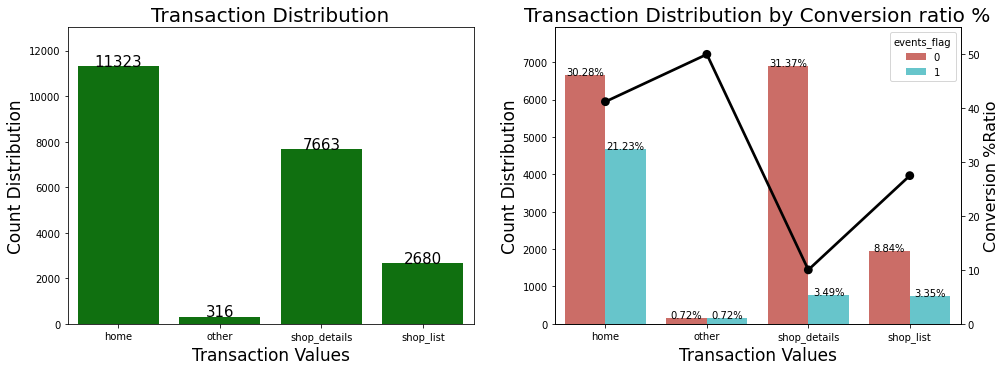

Plot
z statistic: 46.65
p-value: 0.000
ci 95% for control group: [0.403, 0.421]
ci 95% for treatment group: [0.093, 0.107]
z statistic: 13.12
p-value: 0.000
ci 95% for control group: [0.403, 0.421]
ci 95% for treatment group: [0.258, 0.292]
z statistic: -3.13
p-value: 0.002
ci 95% for control group: [0.403, 0.421]
ci 95% for treatment group: [0.445, 0.555]
z statistic: -22.09
p-value: 0.000
ci 95% for control group: [0.093, 0.107]
ci 95% for treatment group: [0.258, 0.292]
z statistic: -21.74
p-value: 0.000
ci 95% for control group: [0.093, 0.107]
ci 95% for treatment group: [0.445, 0.555]
z statistic: -8.26
p-value: 0.000
ci 95% for control group: [0.258, 0.292]
ci 95% for treatment group: [0.445, 0.555]


Event       Group A       Group B        p-value AB Hypothesis  \
0  transaction          home  shop_details   0.000000e+00     Reject H0   
0  transaction          home     shop_list   2.629989e-39     Reject H0   
0  transaction          home         other   1.772592e-03     Reject H0   
0  transaction  shop_details     shop_list  4.237361e-108     Reject H0   
0  transaction  shop_details         other  7.835501e-105     Reject H0   
0  transaction     shop_list         other   1.397625e-16     Reject H0   

                   Comment  
0  Groups are not similar!  
0  Groups are not similar!  
0  Groups are not similar!  
0  Groups are not similar!  
0  Groups are not similar!  
0  Groups are not similar!

In [360]:
EVENT = 'transaction'
MONTH = 'all'
COL = 'landingPage'
BINARY_NAME = 'Transaction'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
False
Duplicate number of ids is: 
304


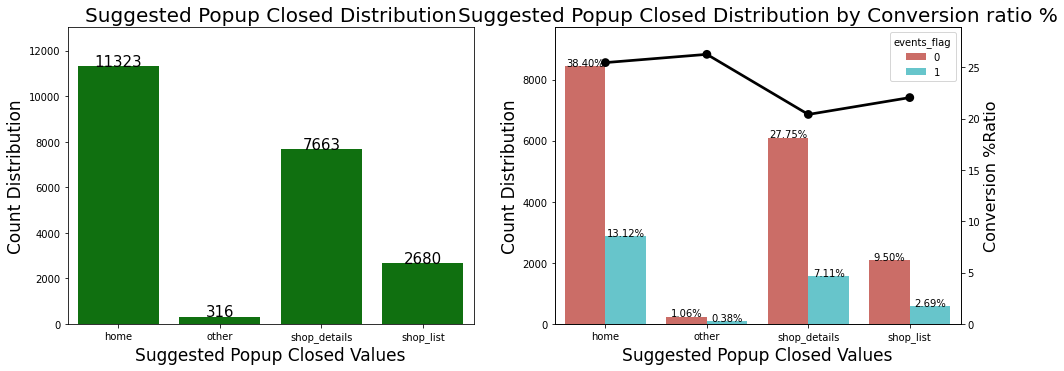

Plot
z statistic: 8.06
p-value: 0.000
ci 95% for control group: [0.247, 0.263]
ci 95% for treatment group: [0.195, 0.213]
z statistic: 3.67
p-value: 0.000
ci 95% for control group: [0.247, 0.263]
ci 95% for treatment group: [0.205, 0.236]
z statistic: -0.32
p-value: 0.746
ci 95% for control group: [0.247, 0.263]
ci 95% for treatment group: [0.214, 0.311]
z statistic: -1.80
p-value: 0.072
ci 95% for control group: [0.195, 0.213]
ci 95% for treatment group: [0.205, 0.236]
z statistic: -2.52
p-value: 0.012
ci 95% for control group: [0.195, 0.213]
ci 95% for treatment group: [0.214, 0.311]
z statistic: -1.70
p-value: 0.090
ci 95% for control group: [0.205, 0.236]
ci 95% for treatment group: [0.214, 0.311]


Event       Group A       Group B       p-value  \
0  suggested_popup.closed          home  shop_details  7.403827e-16   
0  suggested_popup.closed          home     shop_list  2.382691e-04   
0  suggested_popup.closed          home         other  7.462067e-01   
0  suggested_popup.closed  shop_details     shop_list  7.153092e-02   
0  suggested_popup.closed  shop_details         other  1.171518e-02   
0  suggested_popup.closed     shop_list         other  8.977750e-02   

       AB Hypothesis                  Comment  
0          Reject H0  Groups are not similar!  
0          Reject H0  Groups are not similar!  
0  Fail to Reject H0      Groups are similar!  
0  Fail to Reject H0      Groups are similar!  
0          Reject H0  Groups are not similar!  
0  Fail to Reject H0      Groups are similar!

In [361]:
EVENT = 'suggested_popup.closed'
MONTH = 'all'
COL = 'landingPage'
BINARY_NAME = 'Suggested Popup Closed'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
False
Duplicate number of ids is: 
304


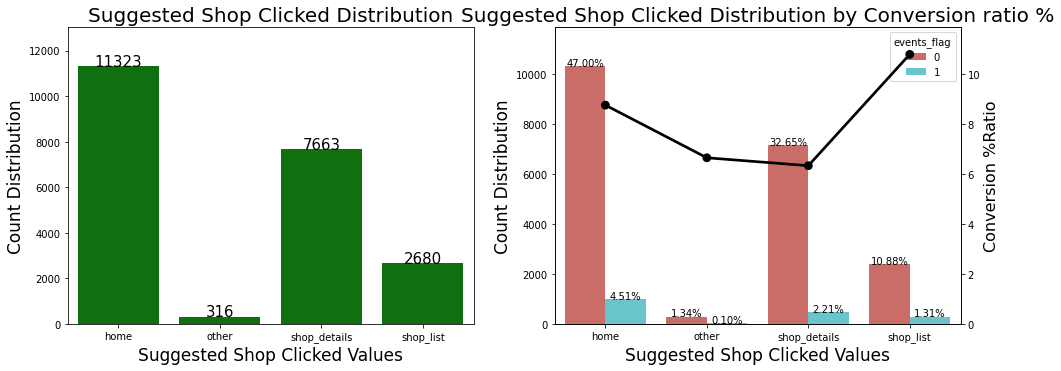

Plot
z statistic: 6.12
p-value: 0.000
ci 95% for control group: [0.082, 0.093]
ci 95% for treatment group: [0.058, 0.069]
z statistic: -3.28
p-value: 0.001
ci 95% for control group: [0.082, 0.093]
ci 95% for treatment group: [0.096, 0.120]
z statistic: 1.31
p-value: 0.190
ci 95% for control group: [0.082, 0.093]
ci 95% for treatment group: [0.039, 0.094]
z statistic: -7.54
p-value: 0.000
ci 95% for control group: [0.058, 0.069]
ci 95% for treatment group: [0.096, 0.120]
z statistic: -0.23
p-value: 0.821
ci 95% for control group: [0.058, 0.069]
ci 95% for treatment group: [0.039, 0.094]
z statistic: 2.28
p-value: 0.022
ci 95% for control group: [0.096, 0.120]
ci 95% for treatment group: [0.039, 0.094]


Event       Group A       Group B       p-value  \
0  suggested_shop.clicked          home  shop_details  9.516279e-10   
0  suggested_shop.clicked          home     shop_list  1.032563e-03   
0  suggested_shop.clicked          home         other  1.899077e-01   
0  suggested_shop.clicked  shop_details     shop_list  4.569574e-14   
0  suggested_shop.clicked  shop_details         other  8.210399e-01   
0  suggested_shop.clicked     shop_list         other  2.235803e-02   

       AB Hypothesis                  Comment  
0          Reject H0  Groups are not similar!  
0          Reject H0  Groups are not similar!  
0  Fail to Reject H0      Groups are similar!  
0          Reject H0  Groups are not similar!  
0  Fail to Reject H0      Groups are similar!  
0          Reject H0  Groups are not similar!

In [362]:
EVENT = 'suggested_shop.clicked'
MONTH = 'all'
COL = 'landingPage'
BINARY_NAME = 'Suggested Shop Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
False
Duplicate number of ids is: 
304


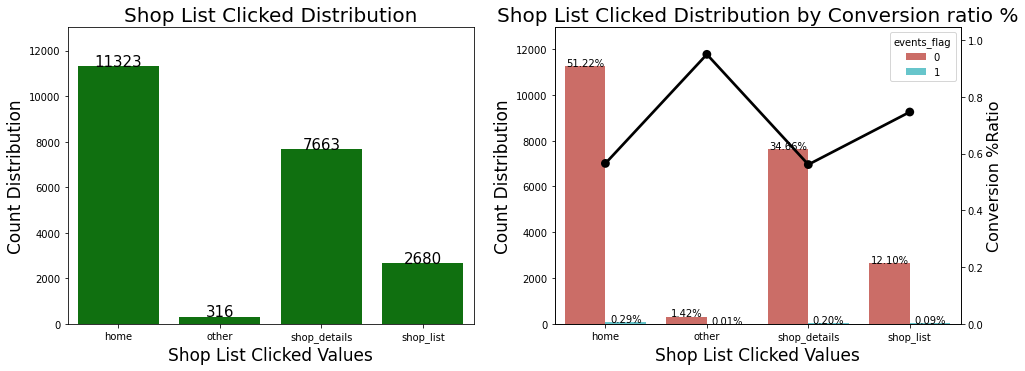

Plot
z statistic: 0.04
p-value: 0.971
ci 95% for control group: [0.004, 0.007]
ci 95% for treatment group: [0.004, 0.007]
z statistic: -1.09
p-value: 0.275
ci 95% for control group: [0.004, 0.007]
ci 95% for treatment group: [0.004, 0.011]
z statistic: -0.89
p-value: 0.373
ci 95% for control group: [0.004, 0.007]
ci 95% for treatment group: [0.000, 0.020]
z statistic: -1.06
p-value: 0.289
ci 95% for control group: [0.004, 0.007]
ci 95% for treatment group: [0.004, 0.011]
z statistic: -0.89
p-value: 0.372
ci 95% for control group: [0.004, 0.007]
ci 95% for treatment group: [0.000, 0.020]
z statistic: -0.39
p-value: 0.696
ci 95% for control group: [0.004, 0.011]
ci 95% for treatment group: [0.000, 0.020]


Event       Group A       Group B   p-value  \
0  suggested_modal.shop_list.clicked          home  shop_details  0.970585   
0  suggested_modal.shop_list.clicked          home     shop_list  0.275071   
0  suggested_modal.shop_list.clicked          home         other  0.373304   
0  suggested_modal.shop_list.clicked  shop_details     shop_list  0.289038   
0  suggested_modal.shop_list.clicked  shop_details         other  0.371685   
0  suggested_modal.shop_list.clicked     shop_list         other  0.695631   

       AB Hypothesis              Comment  
0  Fail to Reject H0  Groups are similar!  
0  Fail to Reject H0  Groups are similar!  
0  Fail to Reject H0  Groups are similar!  
0  Fail to Reject H0  Groups are similar!  
0  Fail to Reject H0  Groups are similar!  
0  Fail to Reject H0  Groups are similar!

In [363]:
EVENT = 'suggested_modal.shop_list.clicked'
MONTH = 'all'
COL = 'landingPage'
BINARY_NAME = 'Shop List Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

### appBrowser

Session ids with __Chrome__ as an app Browser have a higher and significantly different conversion rate than __Firefox__  in __checkout,transaction and suggested shop clicked__ events. <br>

Unique of ids is: 
True
Duplicate number of ids is: 
0


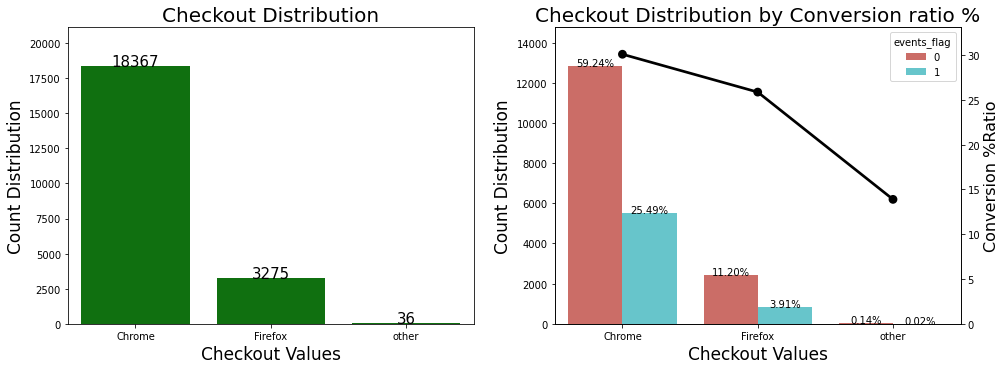

Plot
z statistic: 4.89
p-value: 0.000
ci 95% for control group: [0.294, 0.307]
ci 95% for treatment group: [0.244, 0.274]
z statistic: 2.12
p-value: 0.034
ci 95% for control group: [0.294, 0.307]
ci 95% for treatment group: [0.026, 0.252]
z statistic: 1.63
p-value: 0.102
ci 95% for control group: [0.244, 0.274]
ci 95% for treatment group: [0.026, 0.252]


Event  Group A  Group B   p-value      AB Hypothesis  \
0  checkout.loaded   Chrome  Firefox  0.000001          Reject H0   
0  checkout.loaded   Chrome    other  0.034209          Reject H0   
0  checkout.loaded  Firefox    other  0.102169  Fail to Reject H0   

                   Comment  
0  Groups are not similar!  
0  Groups are not similar!  
0      Groups are similar!

In [383]:
EVENT = 'checkout.loaded'
MONTH = 'all'
COL = 'appBrowser'
BINARY_NAME = 'Checkout'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


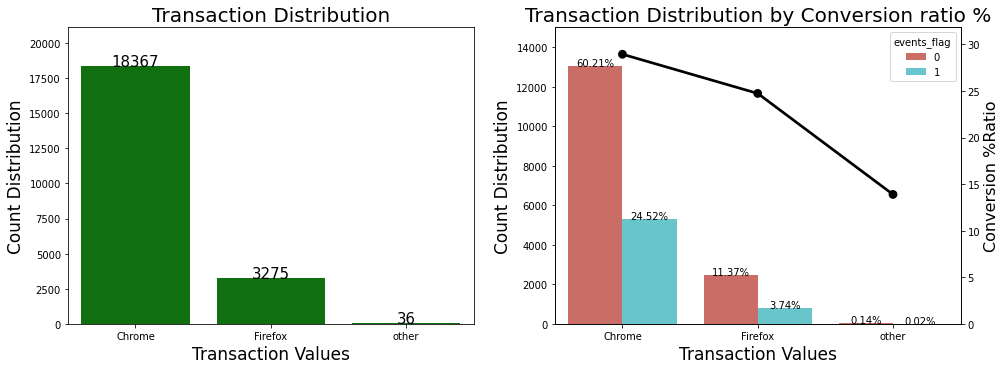

Plot
z statistic: 4.92
p-value: 0.000
ci 95% for control group: [0.283, 0.296]
ci 95% for treatment group: [0.233, 0.262]
z statistic: 1.99
p-value: 0.047
ci 95% for control group: [0.283, 0.296]
ci 95% for treatment group: [0.026, 0.252]
z statistic: 1.50
p-value: 0.133
ci 95% for control group: [0.233, 0.262]
ci 95% for treatment group: [0.026, 0.252]


Event  Group A  Group B       p-value      AB Hypothesis  \
0  transaction   Chrome  Firefox  8.598640e-07          Reject H0   
0  transaction   Chrome    other  4.661300e-02          Reject H0   
0  transaction  Firefox    other  1.330503e-01  Fail to Reject H0   

                   Comment  
0  Groups are not similar!  
0  Groups are not similar!  
0      Groups are similar!

In [384]:
EVENT = 'transaction'
MONTH = 'all'
COL = 'appBrowser'
BINARY_NAME = 'Transaction'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


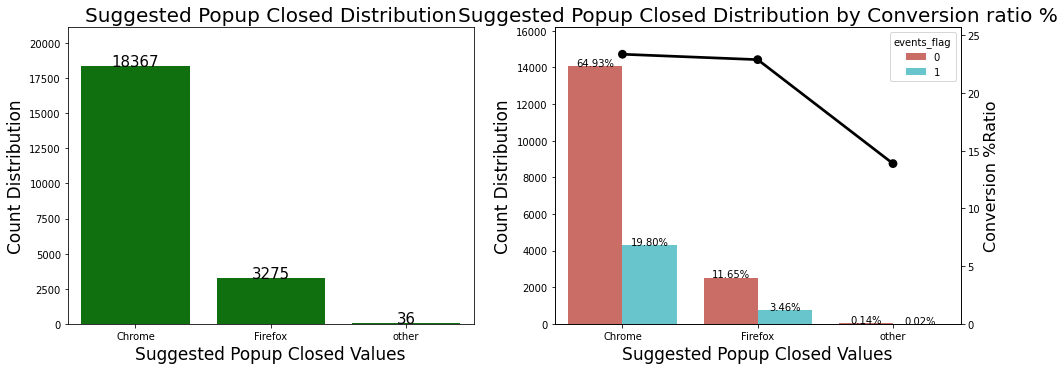

Plot
z statistic: 0.58
p-value: 0.560
ci 95% for control group: [0.228, 0.240]
ci 95% for treatment group: [0.215, 0.243]
z statistic: 1.34
p-value: 0.179
ci 95% for control group: [0.228, 0.240]
ci 95% for treatment group: [0.026, 0.252]
z statistic: 1.28
p-value: 0.200
ci 95% for control group: [0.215, 0.243]
ci 95% for treatment group: [0.026, 0.252]


Event  Group A  Group B   p-value      AB Hypothesis  \
0  suggested_popup.closed   Chrome  Firefox  0.560089  Fail to Reject H0   
0  suggested_popup.closed   Chrome    other  0.179250  Fail to Reject H0   
0  suggested_popup.closed  Firefox    other  0.199936  Fail to Reject H0   

               Comment  
0  Groups are similar!  
0  Groups are similar!  
0  Groups are similar!

In [385]:
EVENT = 'suggested_popup.closed'
MONTH = 'all'
COL = 'appBrowser'
BINARY_NAME = 'Suggested Popup Closed'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


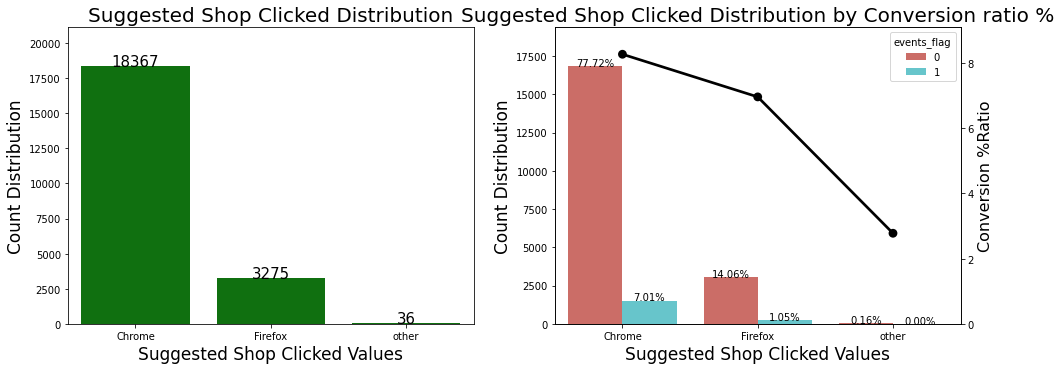

Plot
z statistic: 2.53
p-value: 0.011
ci 95% for control group: [0.079, 0.087]
ci 95% for treatment group: [0.061, 0.078]
z statistic: 1.20
p-value: 0.232
ci 95% for control group: [0.079, 0.087]
ci 95% for treatment group: [0.000, 0.081]
z statistic: 0.98
p-value: 0.325
ci 95% for control group: [0.061, 0.078]
ci 95% for treatment group: [0.000, 0.081]


Event  Group A  Group B   p-value      AB Hypothesis  \
0  suggested_shop.clicked   Chrome  Firefox  0.011333          Reject H0   
0  suggested_shop.clicked   Chrome    other  0.231690  Fail to Reject H0   
0  suggested_shop.clicked  Firefox    other  0.325110  Fail to Reject H0   

                   Comment  
0  Groups are not similar!  
0      Groups are similar!  
0      Groups are similar!

In [386]:
EVENT = 'suggested_shop.clicked'
MONTH = 'all'
COL = 'appBrowser'
BINARY_NAME = 'Suggested Shop Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


2021-10-13 09:28:04,566 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values
2021-10-13 09:28:04,717 [20128] WARNING  matplotlib.text:688: [JupyterRequire] posx and posy should be finite values


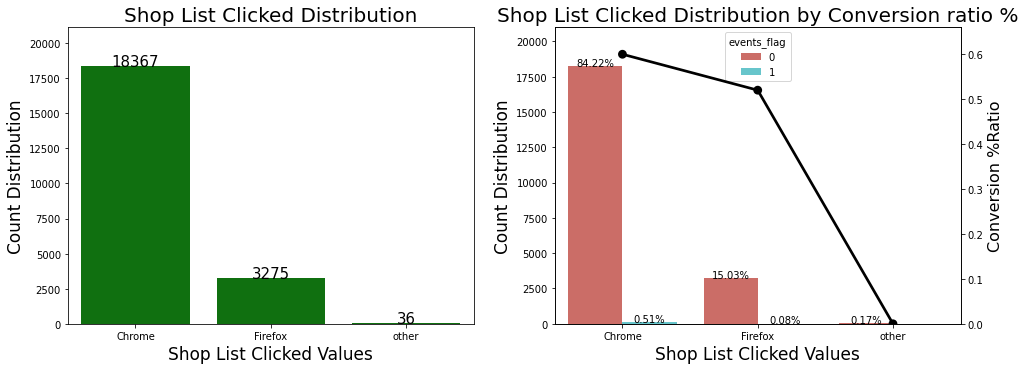

Plot
z statistic: 0.55
p-value: 0.582
ci 95% for control group: [0.005, 0.007]
ci 95% for treatment group: [0.003, 0.008]
z statistic: 0.47
p-value: 0.641
ci 95% for control group: [0.005, 0.007]
ci 95% for treatment group: [0.000, 0.000]
z statistic: 0.43
p-value: 0.665
ci 95% for control group: [0.003, 0.008]
ci 95% for treatment group: [0.000, 0.000]


Event  Group A  Group B   p-value  \
0  suggested_modal.shop_list.clicked   Chrome  Firefox  0.581685   
0  suggested_modal.shop_list.clicked   Chrome    other  0.641412   
0  suggested_modal.shop_list.clicked  Firefox    other  0.664725   

       AB Hypothesis              Comment  
0  Fail to Reject H0  Groups are similar!  
0  Fail to Reject H0  Groups are similar!  
0  Fail to Reject H0  Groups are similar!

In [387]:
EVENT = 'suggested_modal.shop_list.clicked'
MONTH = 'all'
COL = 'appBrowser'
BINARY_NAME = 'Shop List Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

### source

__1)__ Session ids with __direct__ as a source have a higher and significantly different conversion rate than __google__  in __checkout, and transaction__ events. <br>
__2)__ In contrast session ids with __direct__ as a source have a lower and significantly different conversion rate than __google__  in __shop list clicked__ events. <br>


Unique of ids is: 
True
Duplicate number of ids is: 
0


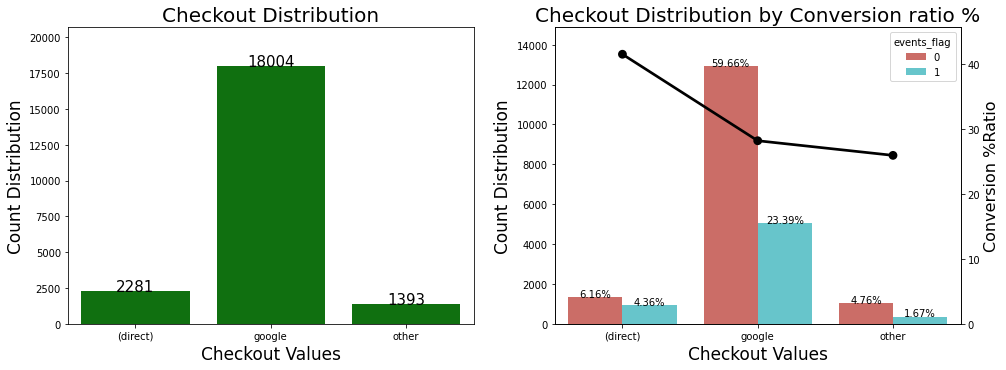

Plot
z statistic: -13.11
p-value: 0.000
ci 95% for control group: [0.275, 0.288]
ci 95% for treatment group: [0.395, 0.435]
z statistic: 1.80
p-value: 0.071
ci 95% for control group: [0.275, 0.288]
ci 95% for treatment group: [0.236, 0.282]
z statistic: 9.56
p-value: 0.000
ci 95% for control group: [0.395, 0.435]
ci 95% for treatment group: [0.236, 0.282]


Event   Group A   Group B       p-value      AB Hypothesis  \
0  checkout.loaded    google  (direct)  2.952190e-39          Reject H0   
0  checkout.loaded    google     other  7.149026e-02  Fail to Reject H0   
0  checkout.loaded  (direct)     other  1.213231e-21          Reject H0   

                       Comment  
0  Variations are not similar!  
0      Variations are similar!  
0  Variations are not similar!

In [388]:
EVENT = 'checkout.loaded'
MONTH = 'all'
COL = 'source'
BINARY_NAME = 'Checkout'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


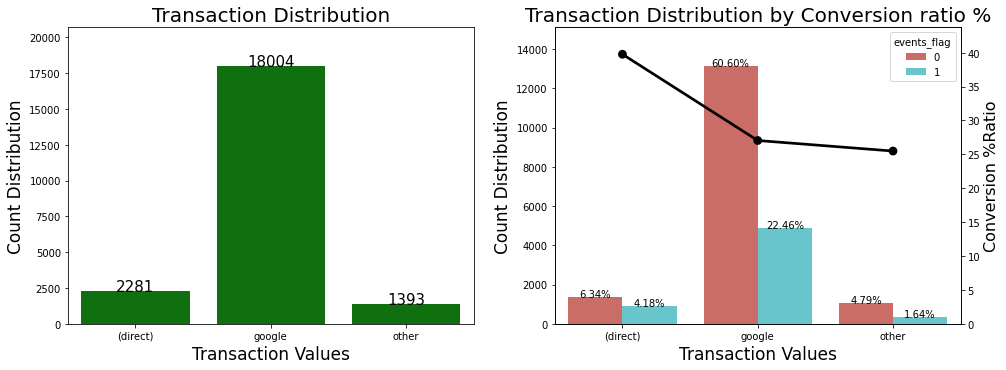

Plot
z statistic: -12.69
p-value: 0.000
ci 95% for control group: [0.264, 0.277]
ci 95% for treatment group: [0.378, 0.418]
z statistic: 1.26
p-value: 0.208
ci 95% for control group: [0.264, 0.277]
ci 95% for treatment group: [0.232, 0.278]
z statistic: 8.84
p-value: 0.000
ci 95% for control group: [0.378, 0.418]
ci 95% for treatment group: [0.232, 0.278]


Event   Group A   Group B       p-value      AB Hypothesis  \
0  transaction    google  (direct)  6.934553e-37          Reject H0   
0  transaction    google     other  2.078103e-01  Fail to Reject H0   
0  transaction  (direct)     other  9.355036e-19          Reject H0   

                       Comment  
0  Variations are not similar!  
0      Variations are similar!  
0  Variations are not similar!

In [389]:
EVENT = 'transaction'
MONTH = 'all'
COL = 'source'
BINARY_NAME = 'Transaction'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


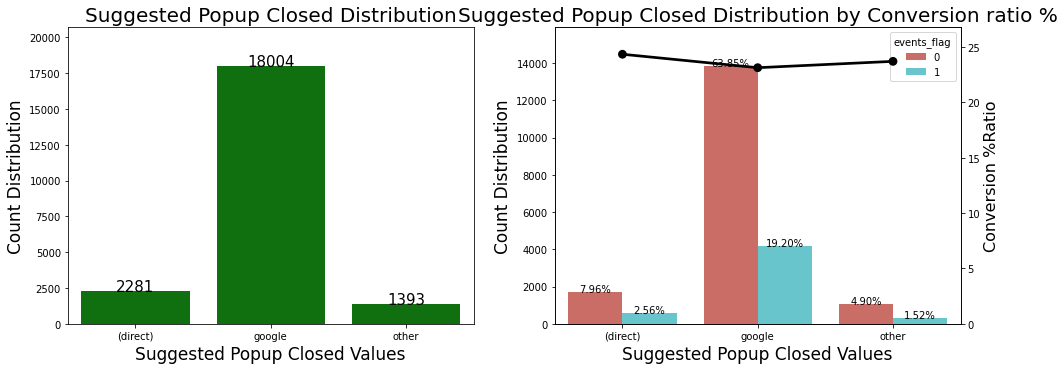

Plot
z statistic: -1.29
p-value: 0.196
ci 95% for control group: [0.225, 0.237]
ci 95% for treatment group: [0.226, 0.261]
z statistic: -0.49
p-value: 0.625
ci 95% for control group: [0.225, 0.237]
ci 95% for treatment group: [0.215, 0.259]
z statistic: 0.44
p-value: 0.659
ci 95% for control group: [0.226, 0.261]
ci 95% for treatment group: [0.215, 0.259]


Event   Group A   Group B   p-value      AB Hypothesis  \
0  suggested_popup.closed    google  (direct)  0.195877  Fail to Reject H0   
0  suggested_popup.closed    google     other  0.625375  Fail to Reject H0   
0  suggested_popup.closed  (direct)     other  0.659060  Fail to Reject H0   

                   Comment  
0  Variations are similar!  
0  Variations are similar!  
0  Variations are similar!

In [390]:
EVENT = 'suggested_popup.closed'
MONTH = 'all'
COL = 'source'
BINARY_NAME = 'Suggested Popup Closed'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


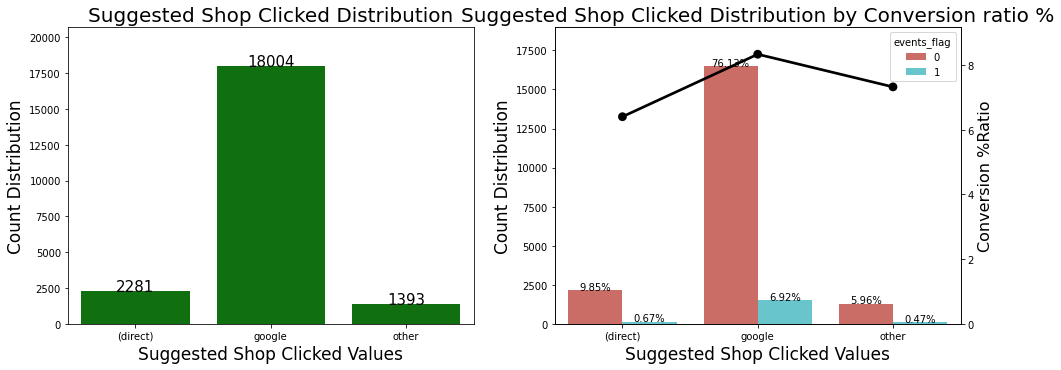

Plot
z statistic: 3.18
p-value: 0.001
ci 95% for control group: [0.079, 0.087]
ci 95% for treatment group: [0.054, 0.074]
z statistic: 1.32
p-value: 0.187
ci 95% for control group: [0.079, 0.087]
ci 95% for treatment group: [0.060, 0.087]
z statistic: -1.08
p-value: 0.280
ci 95% for control group: [0.054, 0.074]
ci 95% for treatment group: [0.060, 0.087]


Event   Group A   Group B   p-value      AB Hypothesis  \
0  suggested_shop.clicked    google  (direct)  0.001465          Reject H0   
0  suggested_shop.clicked    google     other  0.187412  Fail to Reject H0   
0  suggested_shop.clicked  (direct)     other  0.280011  Fail to Reject H0   

                       Comment  
0  Variations are not similar!  
0      Variations are similar!  
0      Variations are similar!

In [391]:
EVENT = 'suggested_shop.clicked'
MONTH = 'all'
COL = 'source'
BINARY_NAME = 'Suggested Shop Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


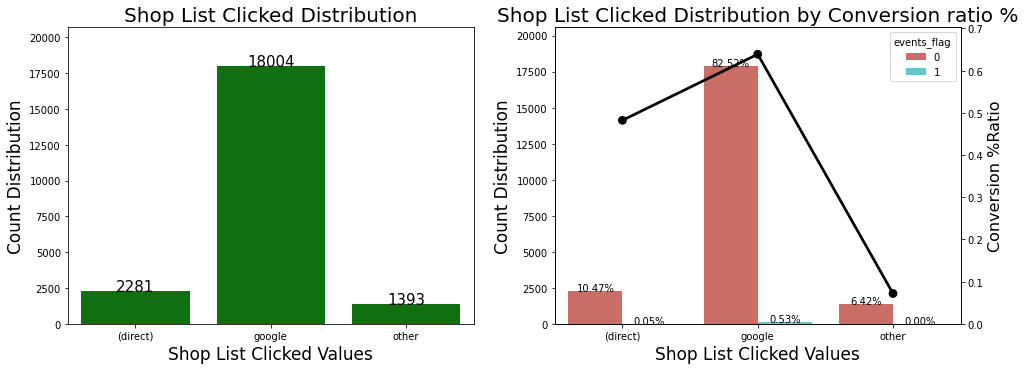

Plot
z statistic: 0.90
p-value: 0.370
ci 95% for control group: [0.005, 0.008]
ci 95% for treatment group: [0.002, 0.008]
z statistic: 2.64
p-value: 0.008
ci 95% for control group: [0.005, 0.008]
ci 95% for treatment group: [0.000, 0.002]
z statistic: 2.12
p-value: 0.034
ci 95% for control group: [0.002, 0.008]
ci 95% for treatment group: [0.000, 0.002]


Event   Group A   Group B   p-value  \
0  suggested_modal.shop_list.clicked    google  (direct)  0.370112   
0  suggested_modal.shop_list.clicked    google     other  0.008190   
0  suggested_modal.shop_list.clicked  (direct)     other  0.034382   

       AB Hypothesis                      Comment  
0  Fail to Reject H0      Variations are similar!  
0          Reject H0  Variations are not similar!  
0          Reject H0  Variations are not similar!

In [392]:
EVENT = 'suggested_modal.shop_list.clicked'
MONTH = 'all'
COL = 'source'
BINARY_NAME = 'Shop List Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

### medium

__1)__ Session ids with __none__ as a medium have a higher and significantly different conversion rate than all the others in __checkout, and transaction__ events. <br>
__2)__ In contrast session ids with __cpc__ as a medium have a higher and significantly different conversion rate than __organic__  in __suggested popup closed__ events. <br>
__3)__ Session ids with __cpc__ as a medium have a higher and significantly different conversion rate than __organic, other and none__  in __suggested shop clicked__ events. <br>
__4)__ Session ids with __organic and cpc__ as a medium have a higher and significantly different conversion rate than __other__  in __shop list clicked__ events. <br>




Unique of ids is: 
True
Duplicate number of ids is: 
0


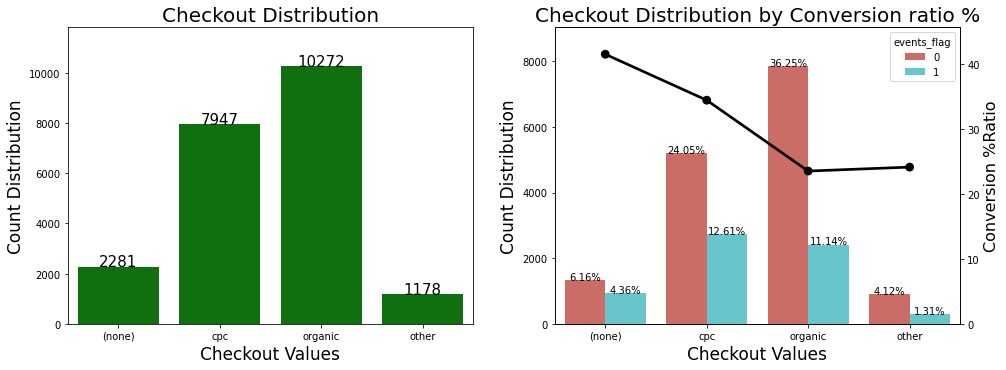

Plot
z statistic: -16.21
p-value: 0.000
ci 95% for control group: [0.227, 0.243]
ci 95% for treatment group: [0.334, 0.354]
z statistic: -0.47
p-value: 0.641
ci 95% for control group: [0.227, 0.243]
ci 95% for treatment group: [0.217, 0.266]
z statistic: -17.54
p-value: 0.000
ci 95% for control group: [0.227, 0.243]
ci 95% for treatment group: [0.395, 0.435]
z statistic: -6.20
p-value: 0.000
ci 95% for control group: [0.334, 0.354]
ci 95% for treatment group: [0.395, 0.435]
z statistic: 7.01
p-value: 0.000
ci 95% for control group: [0.334, 0.354]
ci 95% for treatment group: [0.217, 0.266]
z statistic: 10.11
p-value: 0.000
ci 95% for control group: [0.395, 0.435]
ci 95% for treatment group: [0.217, 0.266]


Event  Group A Group B       p-value      AB Hypothesis  \
0  checkout.loaded  organic     cpc  4.427301e-59          Reject H0   
0  checkout.loaded  organic   other  6.414764e-01  Fail to Reject H0   
0  checkout.loaded  organic  (none)  7.408353e-69          Reject H0   
0  checkout.loaded      cpc  (none)  5.587006e-10          Reject H0   
0  checkout.loaded      cpc   other  2.412427e-12          Reject H0   
0  checkout.loaded   (none)   other  4.975300e-24          Reject H0   

                   Comment  
0  Groups are not similar!  
0      Groups are similar!  
0  Groups are not similar!  
0  Groups are not similar!  
0  Groups are not similar!  
0  Groups are not similar!

In [394]:
EVENT = 'checkout.loaded'
MONTH = 'all'
COL = 'medium'
BINARY_NAME = 'Checkout'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


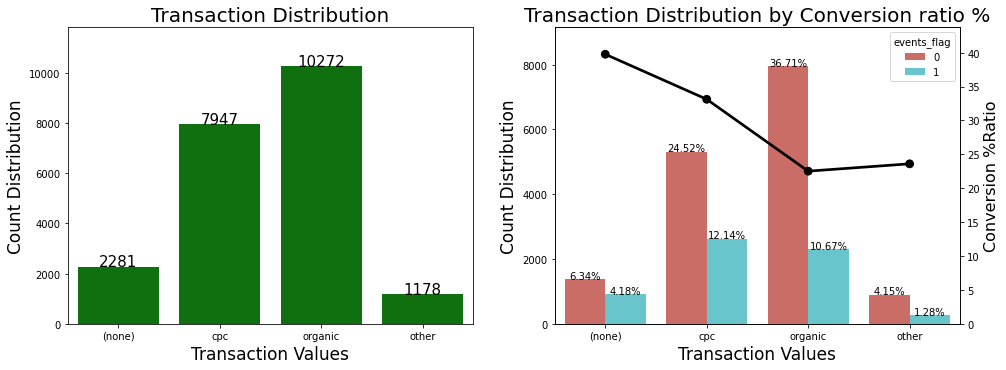

Plot
z statistic: -15.96
p-value: 0.000
ci 95% for control group: [0.217, 0.233]
ci 95% for treatment group: [0.321, 0.342]
z statistic: -0.84
p-value: 0.401
ci 95% for control group: [0.217, 0.233]
ci 95% for treatment group: [0.212, 0.260]
z statistic: -17.06
p-value: 0.000
ci 95% for control group: [0.217, 0.233]
ci 95% for treatment group: [0.378, 0.418]
z statistic: -5.88
p-value: 0.000
ci 95% for control group: [0.321, 0.342]
ci 95% for treatment group: [0.378, 0.418]
z statistic: 6.54
p-value: 0.000
ci 95% for control group: [0.321, 0.342]
ci 95% for treatment group: [0.212, 0.260]
z statistic: 9.49
p-value: 0.000
ci 95% for control group: [0.378, 0.418]
ci 95% for treatment group: [0.212, 0.260]


Event  Group A Group B       p-value      AB Hypothesis  \
0  transaction  organic     cpc  2.488310e-57          Reject H0   
0  transaction  organic   other  4.006443e-01  Fail to Reject H0   
0  transaction  organic  (none)  2.890394e-65          Reject H0   
0  transaction      cpc  (none)  4.109068e-09          Reject H0   
0  transaction      cpc   other  6.036979e-11          Reject H0   
0  transaction   (none)   other  2.244821e-21          Reject H0   

                   Comment  
0  Groups are not similar!  
0      Groups are similar!  
0  Groups are not similar!  
0  Groups are not similar!  
0  Groups are not similar!  
0  Groups are not similar!

In [395]:
EVENT = 'transaction'
MONTH = 'all'
COL = 'medium'
BINARY_NAME = 'Transaction'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


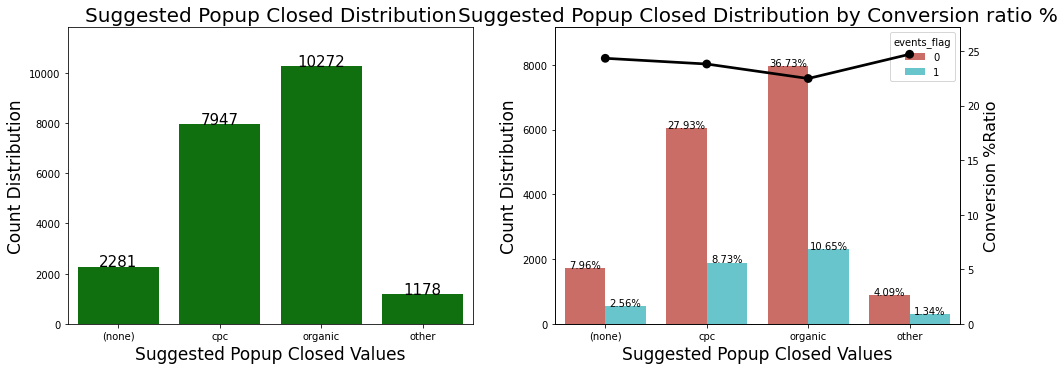

Plot
z statistic: -2.11
p-value: 0.035
ci 95% for control group: [0.217, 0.233]
ci 95% for treatment group: [0.229, 0.247]
z statistic: -1.73
p-value: 0.084
ci 95% for control group: [0.217, 0.233]
ci 95% for treatment group: [0.222, 0.272]
z statistic: -1.91
p-value: 0.056
ci 95% for control group: [0.217, 0.233]
ci 95% for treatment group: [0.226, 0.261]
z statistic: -0.52
p-value: 0.605
ci 95% for control group: [0.229, 0.247]
ci 95% for treatment group: [0.226, 0.261]
z statistic: -0.67
p-value: 0.502
ci 95% for control group: [0.229, 0.247]
ci 95% for treatment group: [0.222, 0.272]
z statistic: -0.24
p-value: 0.810
ci 95% for control group: [0.226, 0.261]
ci 95% for treatment group: [0.222, 0.272]


Event  Group A Group B   p-value      AB Hypothesis  \
0  suggested_popup.closed  organic     cpc  0.034666          Reject H0   
0  suggested_popup.closed  organic   other  0.084349  Fail to Reject H0   
0  suggested_popup.closed  organic  (none)  0.056448  Fail to Reject H0   
0  suggested_popup.closed      cpc  (none)  0.605303  Fail to Reject H0   
0  suggested_popup.closed      cpc   other  0.501532  Fail to Reject H0   
0  suggested_popup.closed   (none)   other  0.809666  Fail to Reject H0   

                   Comment  
0  Groups are not similar!  
0      Groups are similar!  
0      Groups are similar!  
0      Groups are similar!  
0      Groups are similar!  
0      Groups are similar!

In [396]:
EVENT = 'suggested_popup.closed'
MONTH = 'all'
COL = 'medium'
BINARY_NAME = 'Suggested Popup Closed'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


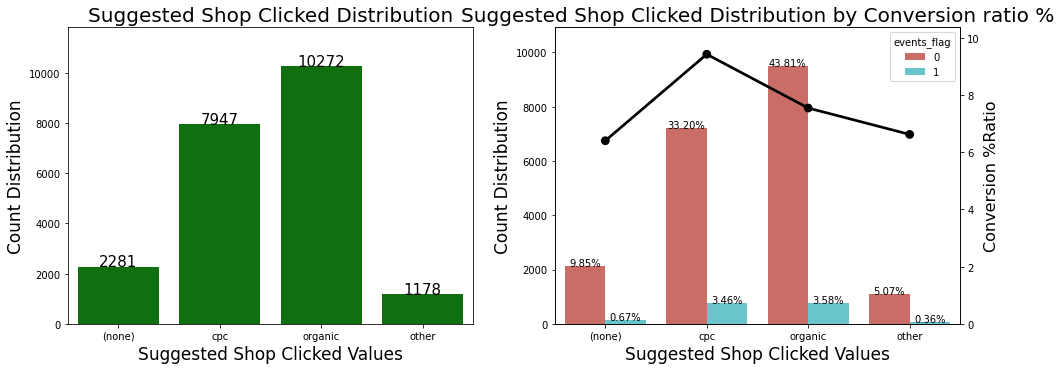

Plot
z statistic: -4.55
p-value: 0.000
ci 95% for control group: [0.070, 0.081]
ci 95% for treatment group: [0.088, 0.101]
z statistic: 1.14
p-value: 0.253
ci 95% for control group: [0.070, 0.081]
ci 95% for treatment group: [0.052, 0.080]
z statistic: 1.90
p-value: 0.058
ci 95% for control group: [0.070, 0.081]
ci 95% for treatment group: [0.054, 0.074]
z statistic: 4.51
p-value: 0.000
ci 95% for control group: [0.088, 0.101]
ci 95% for treatment group: [0.054, 0.074]
z statistic: 3.13
p-value: 0.002
ci 95% for control group: [0.088, 0.101]
ci 95% for treatment group: [0.052, 0.080]
z statistic: -0.25
p-value: 0.803
ci 95% for control group: [0.054, 0.074]
ci 95% for treatment group: [0.052, 0.080]


Event  Group A Group B   p-value      AB Hypothesis  \
0  suggested_shop.clicked  organic     cpc  0.000005          Reject H0   
0  suggested_shop.clicked  organic   other  0.252956  Fail to Reject H0   
0  suggested_shop.clicked  organic  (none)  0.058003  Fail to Reject H0   
0  suggested_shop.clicked      cpc  (none)  0.000007          Reject H0   
0  suggested_shop.clicked      cpc   other  0.001760          Reject H0   
0  suggested_shop.clicked   (none)   other  0.802635  Fail to Reject H0   

                   Comment  
0  Groups are not similar!  
0      Groups are similar!  
0      Groups are similar!  
0  Groups are not similar!  
0  Groups are not similar!  
0      Groups are similar!

In [397]:
EVENT = 'suggested_shop.clicked'
MONTH = 'all'
COL = 'medium'
BINARY_NAME = 'Suggested Shop Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

Unique of ids is: 
True
Duplicate number of ids is: 
0


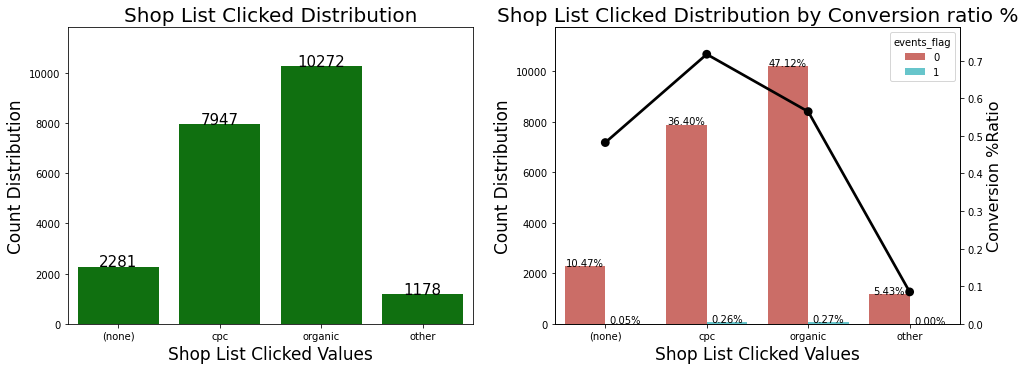

Plot
z statistic: -1.29
p-value: 0.197
ci 95% for control group: [0.004, 0.007]
ci 95% for treatment group: [0.005, 0.009]
z statistic: 2.18
p-value: 0.029
ci 95% for control group: [0.004, 0.007]
ci 95% for treatment group: [0.000, 0.003]
z statistic: 0.48
p-value: 0.630
ci 95% for control group: [0.004, 0.007]
ci 95% for treatment group: [0.002, 0.008]
z statistic: 1.22
p-value: 0.223
ci 95% for control group: [0.005, 0.009]
ci 95% for treatment group: [0.002, 0.008]
z statistic: 2.55
p-value: 0.011
ci 95% for control group: [0.005, 0.009]
ci 95% for treatment group: [0.000, 0.003]
z statistic: 1.88
p-value: 0.060
ci 95% for control group: [0.002, 0.008]
ci 95% for treatment group: [0.000, 0.003]


Event  Group A Group B   p-value  \
0  suggested_modal.shop_list.clicked  organic     cpc  0.197104   
0  suggested_modal.shop_list.clicked  organic   other  0.029386   
0  suggested_modal.shop_list.clicked  organic  (none)  0.630178   
0  suggested_modal.shop_list.clicked      cpc  (none)  0.223446   
0  suggested_modal.shop_list.clicked      cpc   other  0.010814   
0  suggested_modal.shop_list.clicked   (none)   other  0.059625   

       AB Hypothesis                  Comment  
0  Fail to Reject H0      Groups are similar!  
0          Reject H0  Groups are not similar!  
0  Fail to Reject H0      Groups are similar!  
0  Fail to Reject H0      Groups are similar!  
0          Reject H0  Groups are not similar!  
0  Fail to Reject H0      Groups are similar!

In [399]:
EVENT = 'suggested_modal.shop_list.clicked'
MONTH = 'all'
COL = 'medium'
BINARY_NAME = 'Shop List Clicked'

config_dict = {"EVENT": EVENT,
               "MONTH": MONTH,
               "COL": COL,
"BINARY_NAME": BINARY_NAME
}

df_checkout_ab, df_ab_all = ABTestFlowCat(data,config_dict["EVENT"],
                                       config_dict["MONTH"],
                                      config_dict["COL"],
                                      config_dict["BINARY_NAME"])

df_ab_all

In [402]:
data.columns

Index(['session_id', 'exp_participated_page', 'exp_id', 'exp_name', 'event_id',
       'event_name', 'event_key', 'variation_id', 'variation_name',
       'metric_offset', 'events', 'visitType', 'landingPage', 'appBrowser',
       'source', 'medium', 'date', 'variation_binary', 'date:day',
       'date:day_of_week', 'date:is_weekend', 'date:month',
       'date:day_of_year'],
      dtype='object')